In [2]:
import numpy as np
import matplotlib.pyplot as plt
import gym
from gym import error, spaces, utils
from gym.utils import seeding
from enum import Enum

class Plant:
    def __init__(self, species, maturity=110):
        self.species = species
        self.maturity = maturity         # consider 'days_to_maturity'
        self.age = 0
        
    def __repr__(self):
        return "{}".format(self.species)
    

class Field(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self, size=5, sow_limit=200, season=120, calendar=0):
        # parameters for overall field character
        self.size = size
        self.sow_limit = sow_limit
        self.season = season
        self.calendar = calendar
        
        # constants for computing end-of-season reward---distances represent meters
        self.crowding_dist = .02
        self.maize_maize_dist = .1
        self.bean_support_dist = .1
        self.crowding_penalty = .1
        self.maize_maize_penalty = .9
        self.bean_support_bonus = .6
        
        # OpenAI action and observation space specifications
        self.action_space = spaces.Discrete(4)
        ### self.observation_space = spaces.???
        
        # field is initialized by calling reset()
        self.field = None
        
    def step(self, action):
        # sow plants (or wait) depending on actions chosen
        # action is an array of n choices; value of n specified in agent code sow_limit
        # could be cleaned up with plants as an enumeration?
        
                   
             ## this part of the code is a work in progress!!   
             ##------------------START OF WIP------------------------------------   
                    
             #declare a new variable that will be the result of the computer figuring out where we want to plant   
             #developed_coord = curr   
             #curr is the result from rollout   
           
             #planttypeTuple = ("Maize", "Bean", "Squash")   
                
             #coordTuple = curr.strip().split()    
                
             #self.field = np.append(self.field, [[self.size*(coordTuple[0]), self.size*(coordTuple[1]), self.size*(coordTuple[2]), Plant(planttypeTuple[0]), Plant(planttypeTuple[1], Plant(planttypeTuple[2]))])   ,
                
            
            ###Experiment: each choice should be represented as an array with 3 elements:
            ### plant choice, y coordinate, x coordinate (in that order).
            ### i.e. action should look like: [[choice1, y1, x1], [choice2, y2, x2]...]
               
        for choice in action:
            if choice[0] == 0:
                self.field = np.append(self.field, [[self.size * choice[1], 
                                                 self.size * choice[2], 
                                                 Plant('Maize')]], axis=0)
            elif choice[0] == 1:
                self.field = np.append(self.field, [[self.size * choice[1], 
                                                 self.size * choice[2], 
                                                 Plant('Bean')]], axis=0)
            elif choice[0] == 2:
                self.field = np.append(self.field, [[self.size * choice[1], 
                                                 self.size * choice[2], 
                                                 Plant('Squash')]], axis=0)
            # when choice == 3, nothing is done (agent waits)   

             ##--------------------------END OF WIP----------------------------------   
                                                    
     #         for choice in action:   
     #             if choice == 0:   
     #                 self.field = np.append(self.field, [[self.size * coordTuple,    
     #                                              self.size * coordTuple,    
     #                                              Plant('Maize')]], axis=0)   
        
     #             elif choice == 1:   
     #                 self.field = np.append(self.field, [[self.size * input(),    
     #                                              self.size * input(),    
     #                                              Plant('Bean')]], axis=0)   
     #             elif choice == 2:   ,
     #                 self.field = np.append(self.field, [[self.size * input(),    
     #                                              self.size * input(),    
     #                                              Plant('Squash')]], axis=0)   
            
        
        # increment timekeeping
        self.calendar +=1
        for plant in self.field:
            plant[2].age += 1
            
        done = self.calendar == self.season
            
        if not done:
            reward = 0
        else:
            reward = self.get_reward()
            
        return self.field, reward, done, {}
    
    def reset(self):
        # field is initialized with one random corn plant in order to make sowing (by np.append) work
        self.field = np.array([[self.size * np.random.random(), 
                                self.size * np.random.random(), 
                                Plant('Maize')]])
        # timekeeping is reset
        self.calendar = 0
        
    def render(self, mode='human'):
        # initialize plant type arrays so that pyplot won't break if any is empty
        maize = np.array([[None, None]])
        bean = np.array([[None, None]])
        squash = np.array([[None, None]])
        maize_imm = np.array([[None, None]])
        bean_imm = np.array([[None, None]])
        squash_imm = np.array([[None, None]])
        
        # replace initial arrays with coordinates for each plant type; imm are plants that haven't matured
        maize = np.array([row for row in self.field 
                             if row[2].__repr__() == 'Maize' and row[2].age >= row[2].maturity])
        bean = np.array([row for row in self.field 
                            if row[2].__repr__() == 'Bean' and row[2].age >= row[2].maturity])
        squash = np.array([row for row in self.field 
                              if row[2].__repr__() == 'Squash' and row[2].age >= row[2].maturity])
        maize_imm = np.array([row for row in self.field 
                             if row[2].__repr__() == 'Maize' and row[2].age < row[2].maturity])
        bean_imm = np.array([row for row in self.field 
                             if row[2].__repr__() == 'Bean' and row[2].age < row[2].maturity])
        squash_imm = np.array([row for row in self.field 
                             if row[2].__repr__() == 'Squash' and row[2].age < row[2].maturity])
        
        # plot the field---currently breaks if any plant type is absent
        plt.figure(figsize=(10, 10))
        plt.scatter(maize[:,0], maize[:,1], c='green', s=200, marker = 'o', alpha=.5, edgecolor='#303030')
        plt.scatter(bean[:,0], bean[:,1], c='brown', s=150, marker = 'o', alpha=.5, edgecolor='#303030')
        plt.scatter(squash[:,0], squash[:,1], c='orange', s=400, marker = 'o', alpha=.5, edgecolor='#303030')
        plt.scatter(maize_imm[:,0], maize_imm[:,1], c='green', s=200, marker = 'o', alpha=.1, edgecolor='#303030')
        plt.scatter(bean_imm[:,0], bean_imm[:,1], c='brown', s=200, marker = 'o', alpha=.1, edgecolor='#303030')
        plt.scatter(squash_imm[:,0], squash_imm[:,1], c='orange', s=200, marker = 'o', alpha=.1, edgecolor='#303030')

        plt.show()
        
        print("Total yield in Calories is {}.\n---\n".format(round(reward, 1)))
    
    def close(self):
        # unneeded right now? AFAICT this is only used to shut down realtime movie visualizations
        pass
    
    def get_reward(self):
        # array of plant coordinates for computing distances
        xy_array = np.array([[row[0], row[1]] for row in self.field])

        # distances[m,n] is distance from mth to nth plant in field
        distances = np.linalg.norm(xy_array - xy_array[:,None], axis=-1)
        
        reward = 0
        i = 0
        while i < len(self.field):
            if self.field[i,2].age < self.field[i,2].maturity:
                reward += 0
            elif self.field[i,2].__repr__() == 'Maize':
                cal = 1
                j = 0
                while j < len(distances[0]):
                    if (self.field[j,2].__repr__() == 'Bean' 
                            and distances[i,j] < self.bean_support_dist):
                        cal += self.bean_support_bonus
                    if (self.field[j,2].__repr__() == 'Maize' 
                            and i !=j 
                            and distances[i,j] < self.maize_maize_dist):
                        cal *= self.maize_maize_penalty
                    if 0 < distances[i,j] < self.crowding_dist:
                        cal *= self.crowding_penalty
                    j += 1
                reward += cal
            elif self.field[i,2].__repr__() == 'Bean':
                reward += .25
            elif self.field[i,2].__repr__() == 'Squash':
                reward += 3
            i += 1        
        return reward


In [3]:
class Path:

    def __init__(self, path, score):
        self.path = path
        self.score = score

    def get_score(self):
        return self.score
    
    def get_path(self):
        return self.path


In [4]:
##
# TODO: Write tests to check/graph the distribution of the 4 actions in each path, and changes over generation
# Write tests to test each of the functions (tournament, mutation, elitism, etc.)
# Write tests to check the mean (or median), std dev (or range), and max + min at each generation
# Essentially, figure out why it plateus so early in the training
# Determine what an ideal yield should look like in this environment (in terms of calories, how high can we acc go? What is a target?)
##
import numpy as np
import matplotlib.pyplot as plt

class GA_Agent:

    def __init__(self, generations, field, crossover, mutation, pop_size):
        self.generations = generations
        self.field = field
        self.cross = crossover
        self.mutation  = mutation
        self.population = self.generate_new_population(pop_size)

    ##Called with 16 paths
    def run_tournament(self, paths):
        winners = []
        size = len(paths)
        if size == 2:
            return paths
        group_a = paths[0:int(size/2)]
        group_b = paths[int(size/2):size]

        i  = 0

        while i < int(size/2):
            if group_a[i].score > group_a[i + 1].score:
                winners.append(group_a[i])
            else:
                winners.append(group_a[i+1])
            if group_b[i].score > group_b[i+1].score:
                winners.append(group_b[i])
            else:
                winners.append(group_b[i+1])
            i+=2
        return self.run_tournament(winners)
    
    ##Currently does cross = 0.5
    def crossover(self, parents):
        parent_a = parents[0]
        parent_b = parents[1]
        children = []
        new_child = np.empty((0,3))
        new_child_b = np.empty((0,3))

        for i in range(int(self.cross * parent_a.path.shape[0])):
            new_child = np.append(new_child, parent_a.path[i])
            new_child_b = np.append(new_child_b, parent_b.path[i])

        for i in range(int(self.cross * parent_a.path.shape[0]), int(parent_a.path.shape[0])):
            new_child = np.append(new_child, parent_b.path[i])
            new_child_b = np.append(new_child_b, parent_a.path[i])


        new_child = np.reshape(new_child, (int(len(new_child)/3), 3))
        new_child_b = np.reshape(new_child_b, (int(len(new_child_b)/3), 3))
            
        self.field.reset()
        i = 0
        while i < new_child.shape[0]:
            observation, reward, done, _ = self.field.step(new_child[i:i+10])
            i += 10
        to_append = Path(new_child, reward)
        self.mutate(to_append)
        children.append(to_append)

        self.field.reset()
        i = 0
        while i < new_child.shape[0]:
            observation, reward, done, _ = self.field.step(new_child_b[i:i+10])
            i += 10
        to_append = Path(new_child_b, reward)
        self.mutate(to_append)
        children.append(to_append)
        return children
            

    def mutate(self, child):
        for i in range(child.path.shape[0]):
            for j in range(3):
                random_int = np.random.randint(1000)
                if random_int < self.mutation * 1000:
                    if not(j == 0): #if we are not altering the choice (corn, wait, etc.)
                        child.path[i][j] == np.random.random()
                    else: #Altering choice: randomly select one of 4 options
                        child.path[i][j] == np.random.randint(4)


    def run_generation(self, num):
        for i in range(num):
            new_pop = []
            while not(len(new_pop) == len(self.population)):
                tournament_paths = []
                for j in range(16):
                    index = np.random.randint(100)
                    tournament_paths.append(self.population[index])
                best_parents = self.run_tournament(tournament_paths)
                new_children = self.crossover(best_parents)
                for child in new_children:
                    new_pop.append(child)
            self.population = new_pop
            
    def run_generations(self):
        self.run_generation(self.generations)

    def run_verbose_generations(self, num):
        for i in range(num):
            distribution = np.zeros((4,))
            print("Running generation", i, "of", num)
            for child in self.population:
                for action in child.path:
                    distribution[int(action[0])] += 1
            plt.pie(distribution)
            plt.show()
            print("Score:", self.get_pop_score())
            self.run_generation(1)

            

    def generate_new_population(self, size):
        pop = []
        for i in range(size):
            self.field.reset()
            path = np.empty((0,3))
            done = False
            while not(done):
                step = np.ones((10,3))

                for i in range(10):
                    step[i][0] = np.random.randint(4)
                    step[i][1] = np.random.random()
                    step[i][2] = np.random.random()
                observation, reward, done, _ = self.field.step(step)
                for i in range(10):
                    path = np.append(path, step[i])
                path = np.reshape(path, (int(len(path)/3), 3))
            ret = Path(path, reward)
            pop.append(ret)
        return pop

    def get_population(self):
        return self.population

    def get_pop_score(self):
        score = 0
        for path in self.population:
            score += path.score
        return score/len(self.population)

In [5]:
import numpy as np
class Elitist_GA:

    def __init__(self, generations, field, crossover, mutation, pop_size, t_size):
        self.generations = generations
        self.field = field
        self.cross = crossover
        self.mutation  = mutation
        self.population = self.generate_new_population(pop_size)
        self.tournament_size = t_size

    def run_tournament_old(self, paths):
        winners = []
        size = len(paths)
        if size == 2:
            return paths
        group_a = paths[0:int(size/2)]
        group_b = paths[int(size/2):size]

        i  = 0

        while i < int(size/2):
            if group_a[i].score > group_a[i + 1].score:
                winners.append(group_a[i])
            else:
                winners.append(group_a[i+1])
            if group_b[i].score > group_b[i+1].score:
                winners.append(group_b[i])
            else:
                winners.append(group_b[i+1])
            i+=2
        return self.run_tournament(winners)

    def run_tournament(self, paths):
        max_a = 0
        max_b = 0
        winners = []
        for k in range(len(paths)):
            if paths[k].score > paths[max_a].score:
                max_a = k
        winners.append(paths[max_a])
        for k in range(len(paths)):
            if (paths[k].score > paths[max_b].score) and (k != max_a):
                max_b = k
        winners.append(paths[max_b])
        return winners


    
    def crossover(self, parents):
        parent_a = parents[0]
        parent_b = parents[1]
        children = []
        new_child = np.empty((0,3))
        new_child_b = np.empty((0,3))

        for i in range(int(self.cross * parent_a.path.shape[0])):
            new_child = np.append(new_child, parent_a.path[i])
            new_child_b = np.append(new_child_b, parent_b.path[i])

        for i in range(int(self.cross * parent_a.path.shape[0]), int(parent_a.path.shape[0])):
            new_child = np.append(new_child, parent_b.path[i])
            new_child_b = np.append(new_child_b, parent_a.path[i])


        new_child = np.reshape(new_child, (int(len(new_child)/3), 3))
        new_child_b = np.reshape(new_child_b, (int(len(new_child_b)/3), 3))
            
        self.field.reset()
        i = 0
        while i < new_child.shape[0]:
            observation, reward, done, _ = self.field.step(new_child[i:i+10])
            i += 10
        to_append = Path(new_child, reward)
        self.mutate(to_append)
        children.append(to_append)

        self.field.reset()
        i = 0
        while i < new_child.shape[0]:
            observation, reward, done, _ = self.field.step(new_child_b[i:i+10])
            i += 10
        to_append = Path(new_child_b, reward)
        self.mutate(to_append)
        children.append(to_append)
        return children
            

    def mutate(self, child):
        for i in range(child.path.shape[0]):
            for j in range(3):
                random_int = np.random.randint(1000)
                if random_int < self.mutation * 1000:
                    if not(j == 0):
                        child.path[i][j] == np.random.random()
                    else:
                        child.path[i][j] == np.random.randint(4)


    def run_generation(self, num):
        for i in range(num):
            new_pop = []
            max_a = 0
            max_b = 0

            for k in range(len(self.population)):
                if self.population[k].score > self.population[max_a].score:
                    max_a = k
            for k in range(len(self.population)):
                if (self.population[k].score > self.population[max_b].score) and (k != max_a):
                    max_b = k
            best_pop_parents = []
            best_pop_parents.append(self.population[max_a])
            best_pop_parents.append(self.population[max_b])
            new_best_children = self.crossover(best_pop_parents)
            for child in new_best_children:
                new_pop.append(child)
            for parent in best_pop_parents:
                new_pop.append(parent)
            while not(len(new_pop) == len(self.population)):
                tournament_paths = []
                for j in range(self.tournament_size):
                    index = np.random.randint(len(self.population))
                    tournament_paths.append(self.population[index])
                best_parents = self.run_tournament(tournament_paths)
                new_children = self.crossover(best_parents)
                for child in new_children:
                    new_pop.append(child)
            self.population = new_pop
            
    def run_generations(self):
        self.run_generation(self.generations)
        
    def run_verbose_generations(self, num):
        l = ["Corn", "Bean", "Squash", "Wait"]
        for i in range(num):
            distribution = np.zeros((4,))
            print("Running generation", i, "of", num)
            max_yield = 0
            min_yield = 999
            for child in self.population:
                if child.score > max_yield:
                    max_yield = child.score
                if child.score < min_yield:
                    min_yield = child.score
                for action in child.path:
                    distribution[int(action[0])] += 1
            plt.pie(distribution, labels=l)
            plt.show()
            print("Mean Score:", self.get_pop_score())
            print("Max Score:", max_yield)
            print("Min Score:", min_yield)
            self.run_generation(1)


    def generate_new_population(self, size):
        pop = []
        for i in range(size):
            self.field.reset()
            path = np.empty((0,3))
            done = False
            while not(done):
                step = np.ones((10,3))

                for i in range(10):
                    step[i][0] = np.random.randint(4)
                    step[i][1] = np.random.random()
                    step[i][2] = np.random.random()
                observation, reward, done, _ = self.field.step(step)
                for i in range(10):
                    path = np.append(path, step[i])
                path = np.reshape(path, (int(len(path)/3), 3))
            ret = Path(path, reward)
            pop.append(ret)
        return pop

    def get_population(self):
        return self.population

    def get_pop_score(self):
        score = 0
        for path in self.population:
            score += path.score
        return score/len(self.population)

In [12]:
## Testing tournament ##

list = []
for i in range(16):
    list.append(Path([], np.random.randint(16)))
ga = Elitist_GA(1, Field(), 0.5, 0.1, 100, 16)

new_list = ga.run_tournament(list)
print("original")
for child in list:
    print(child.score)
print("results")
for child in new_list:
    print(child.score)


original
2
10
4
6
3
4
7
7
12
2
9
8
3
15
14
8
results
15
14


In [ ]:
new_field = Field()
new_field.reset()
ga = GA_Agent(100, new_field, 0.5, 0.1, 100)

print(ga.get_pop_score())
ga.run_verbose_generations(10)

Yield: 156.368


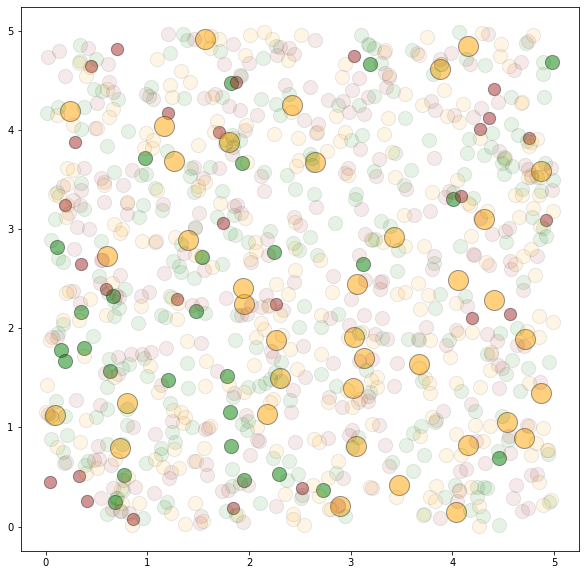

NameError: name 'reward' is not defined

In [16]:
pop = ga.get_population()
render_field = Field()
render_field.reset()

to_print = 99

i = 0
while i < pop[0].path.shape[0]:
    render_field.step(pop[to_print].path[i:i+10])
    i+=10
print("Yield:" , pop[to_print].score)
render_field.render()



Running generation 0 of 500


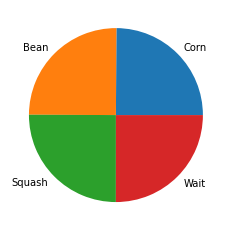

Mean Score: 120.27691676666667
Max Score: 159.86
Min Score: 83.44
Running generation 1 of 500


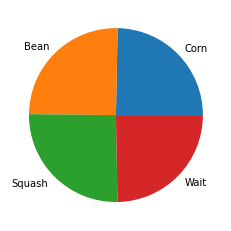

Mean Score: 138.48661076666667
Max Score: 161.74
Min Score: 123.02100000000002
Running generation 2 of 500


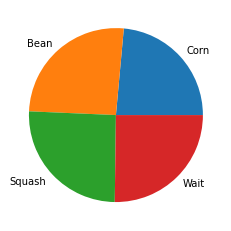

Mean Score: 151.0195485266665
Max Score: 163.12000000000003
Min Score: 134.77
Running generation 3 of 500


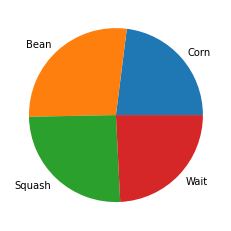

Mean Score: 160.57683378666658
Max Score: 163.72
Min Score: 149.735
Running generation 4 of 500


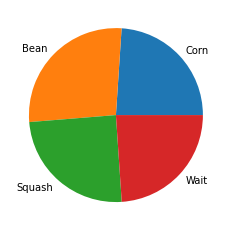

Mean Score: 162.61533133333296
Max Score: 164.32000000000002
Min Score: 160.07
Running generation 5 of 500


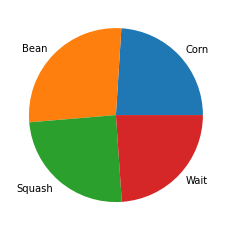

Mean Score: 162.68382033333296
Max Score: 164.92000000000002
Min Score: 161.59000000000003
Running generation 6 of 500


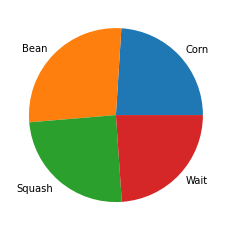

Mean Score: 162.6877429999996
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 7 of 500


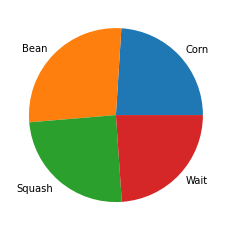

Mean Score: 162.67768746666644
Max Score: 164.92000000000002
Min Score: 160.59100000000004
Running generation 8 of 500


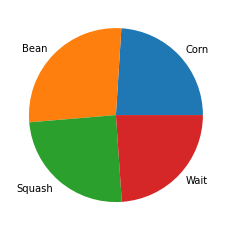

Mean Score: 162.7102499999996
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 9 of 500


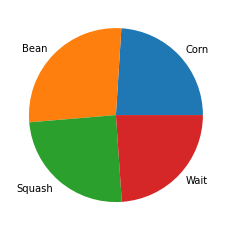

Mean Score: 162.69544599999963
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 10 of 500


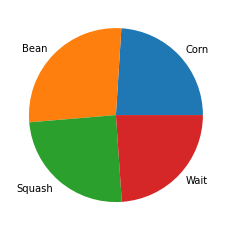

Mean Score: 162.68208666666638
Max Score: 164.92000000000002
Min Score: 161.53500000000003
Running generation 11 of 500


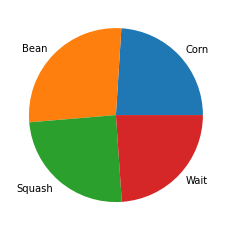

Mean Score: 162.69507549999955
Max Score: 164.92000000000002
Min Score: 160.7631
Running generation 12 of 500


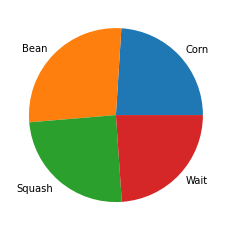

Mean Score: 162.6941866999997
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 13 of 500


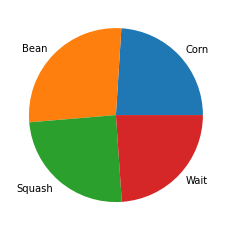

Mean Score: 162.69018966666638
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 14 of 500


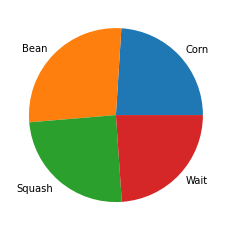

Mean Score: 162.6908534299995
Max Score: 164.92000000000002
Min Score: 161.51000000000002
Running generation 15 of 500


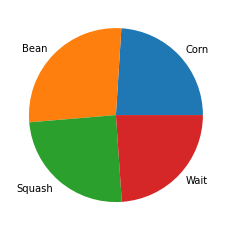

Mean Score: 162.68156499999958
Max Score: 164.92000000000002
Min Score: 161.53440000000003
Running generation 16 of 500


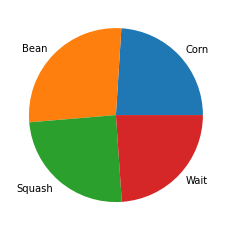

Mean Score: 162.6616336666663
Max Score: 164.92000000000002
Min Score: 160.591
Running generation 17 of 500


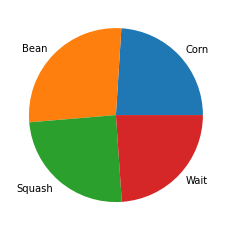

Mean Score: 162.63278069999953
Max Score: 164.92000000000002
Min Score: 161.50100000000003
Running generation 18 of 500


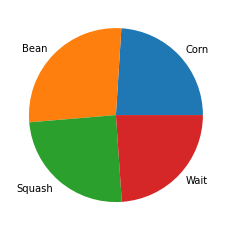

Mean Score: 162.69785333333294
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 19 of 500


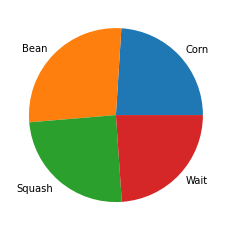

Mean Score: 162.6953999999996
Max Score: 164.92000000000002
Min Score: 161.52
Running generation 20 of 500


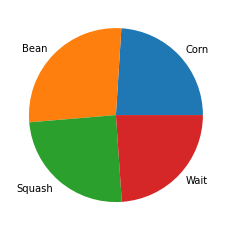

Mean Score: 162.6986379999995
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 21 of 500


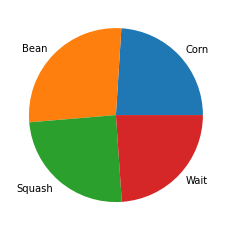

Mean Score: 162.67695999999955
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 22 of 500


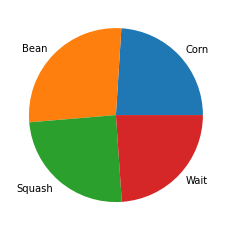

Mean Score: 162.71012999999965
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 23 of 500


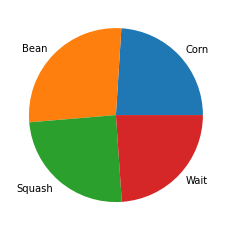

Mean Score: 162.674288333333
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 24 of 500


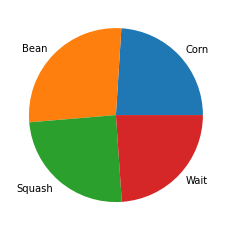

Mean Score: 162.67742666666652
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 25 of 500


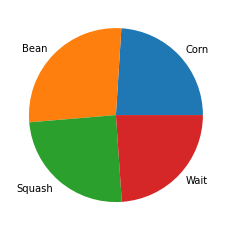

Mean Score: 162.65848699999958
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 26 of 500


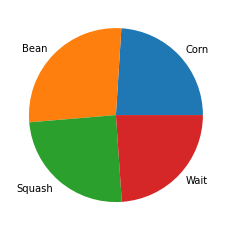

Mean Score: 162.689960333333
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 27 of 500


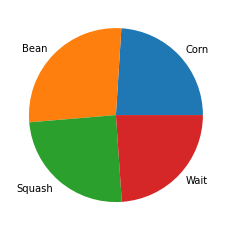

Mean Score: 162.70935666666625
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 28 of 500


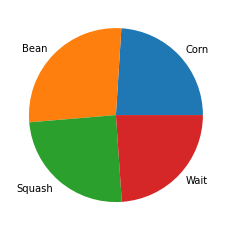

Mean Score: 162.67038566666633
Max Score: 164.92000000000002
Min Score: 161.51000000000002
Running generation 29 of 500


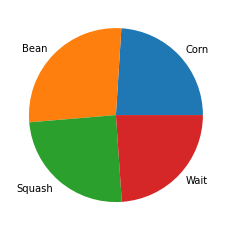

Mean Score: 162.65761713333288
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 30 of 500


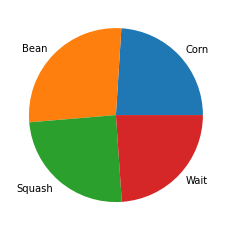

Mean Score: 162.70781499999956
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 31 of 500


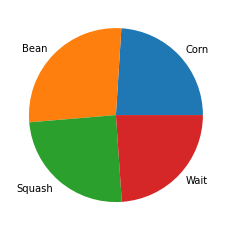

Mean Score: 162.6421699999995
Max Score: 164.92000000000002
Min Score: 160.59100000000004
Running generation 32 of 500


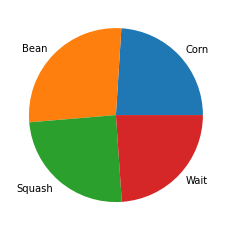

Mean Score: 162.68012966666626
Max Score: 164.92000000000002
Min Score: 161.58300000000003
Running generation 33 of 500


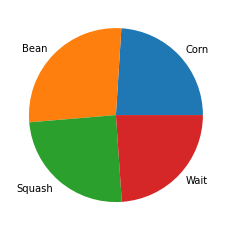

Mean Score: 162.64945958666624
Max Score: 164.92000000000002
Min Score: 161.51100000000002
Running generation 34 of 500


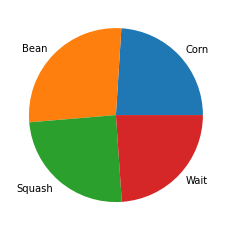

Mean Score: 162.69127666666608
Max Score: 164.92000000000002
Min Score: 161.53440000000003
Running generation 35 of 500


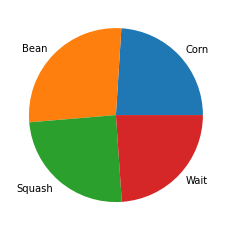

Mean Score: 162.67737633333292
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 36 of 500


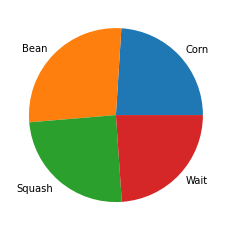

Mean Score: 162.6830416666662
Max Score: 164.92000000000002
Min Score: 160.692
Running generation 37 of 500


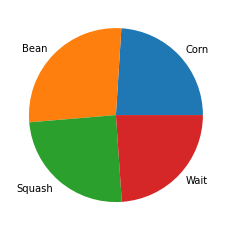

Mean Score: 162.6749859999996
Max Score: 164.92000000000002
Min Score: 160.791
Running generation 38 of 500


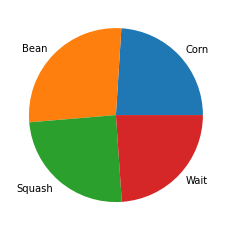

Mean Score: 162.7142646666662
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 39 of 500


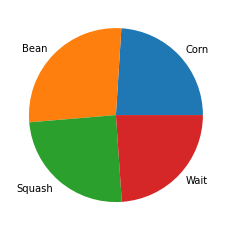

Mean Score: 162.68929666666622
Max Score: 164.92000000000002
Min Score: 161.56500000000003
Running generation 40 of 500


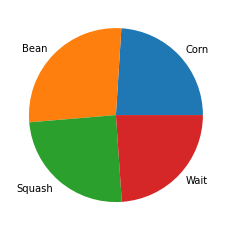

Mean Score: 162.6595879999996
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 41 of 500


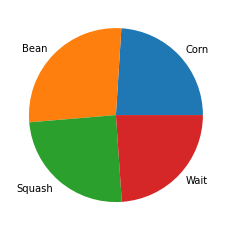

Mean Score: 162.70409766666629
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 42 of 500


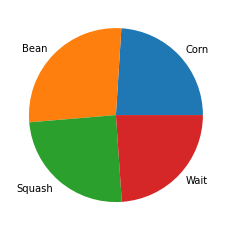

Mean Score: 162.6866799999995
Max Score: 164.92000000000002
Min Score: 161.51000000000002
Running generation 43 of 500


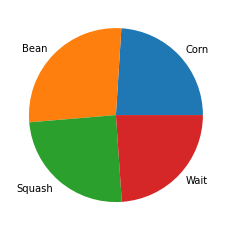

Mean Score: 162.67777666666618
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 44 of 500


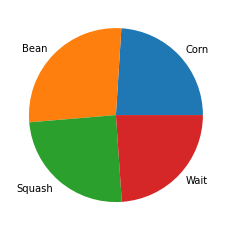

Mean Score: 162.6572642666662
Max Score: 164.92000000000002
Min Score: 160.782
Running generation 45 of 500


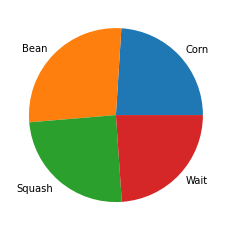

Mean Score: 162.67463999999956
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 46 of 500


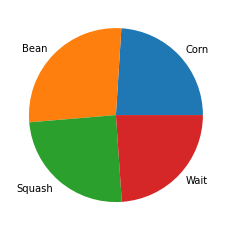

Mean Score: 162.68761546666627
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 47 of 500


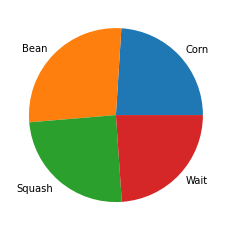

Mean Score: 162.70982999999947
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 48 of 500


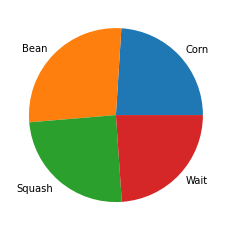

Mean Score: 162.67792053333298
Max Score: 164.92000000000002
Min Score: 161.51100000000002
Running generation 49 of 500


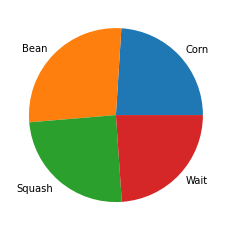

Mean Score: 162.65880666666615
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 50 of 500


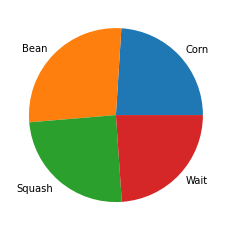

Mean Score: 162.700914333333
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 51 of 500


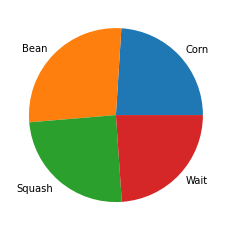

Mean Score: 162.66808033333285
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 52 of 500


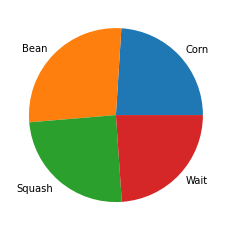

Mean Score: 162.671946333333
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 53 of 500


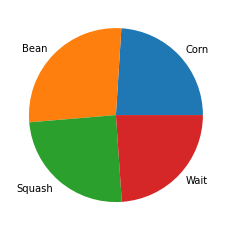

Mean Score: 162.68367869999943
Max Score: 164.92000000000002
Min Score: 161.58561000000003
Running generation 54 of 500


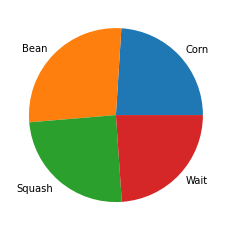

Mean Score: 162.64907999999951
Max Score: 164.92000000000002
Min Score: 161.3
Running generation 55 of 500


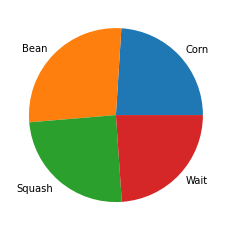

Mean Score: 162.65644803333305
Max Score: 164.92000000000002
Min Score: 161.5029
Running generation 56 of 500


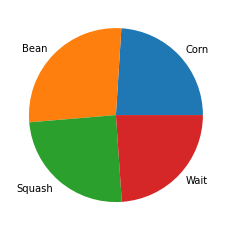

Mean Score: 162.69629333333307
Max Score: 164.92000000000002
Min Score: 161.46099999999998
Running generation 57 of 500


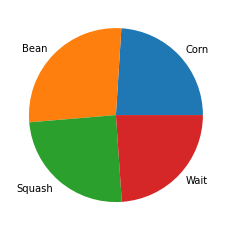

Mean Score: 162.65534499999953
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 58 of 500


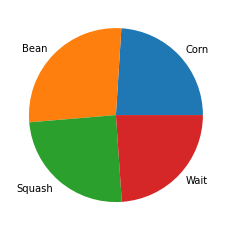

Mean Score: 162.7175069999997
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 59 of 500


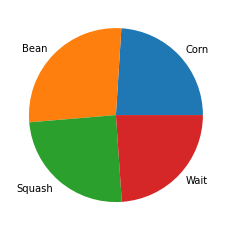

Mean Score: 162.6639321999997
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 60 of 500


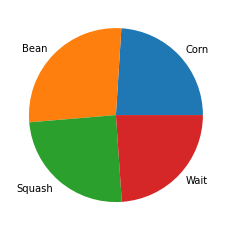

Mean Score: 162.69049999999953
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 61 of 500


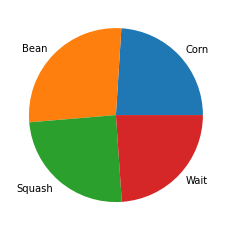

Mean Score: 162.6908186666662
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 62 of 500


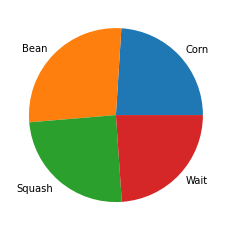

Mean Score: 162.67218699999964
Max Score: 164.92000000000002
Min Score: 161.3
Running generation 63 of 500


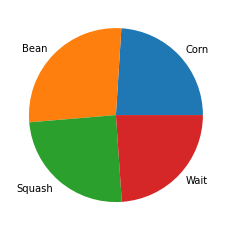

Mean Score: 162.69630499999974
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 64 of 500


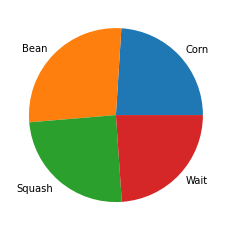

Mean Score: 162.67807999999943
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 65 of 500


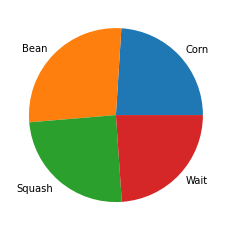

Mean Score: 162.69336799999948
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 66 of 500


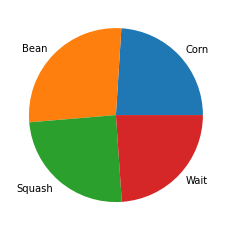

Mean Score: 162.69278799999972
Max Score: 164.92000000000002
Min Score: 161.58900000000003
Running generation 67 of 500


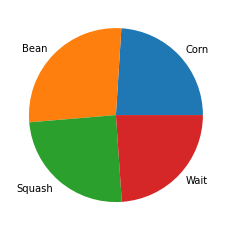

Mean Score: 162.67075899999958
Max Score: 164.92000000000002
Min Score: 161.51100000000002
Running generation 68 of 500


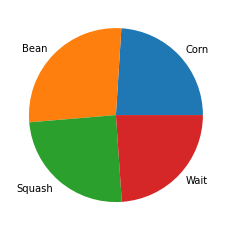

Mean Score: 162.64854999999946
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 69 of 500


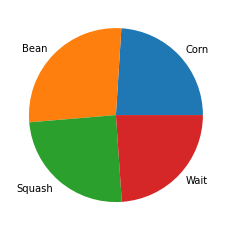

Mean Score: 162.69642179999963
Max Score: 164.92000000000002
Min Score: 161.51000000000002
Running generation 70 of 500


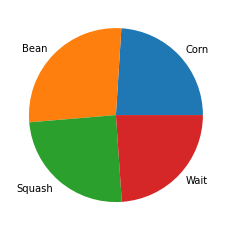

Mean Score: 162.68039899999948
Max Score: 164.92000000000002
Min Score: 161.52900000000002
Running generation 71 of 500


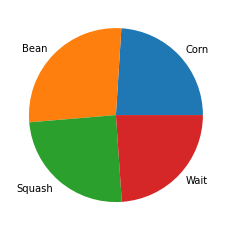

Mean Score: 162.6607769999997
Max Score: 164.92000000000002
Min Score: 160.7631
Running generation 72 of 500


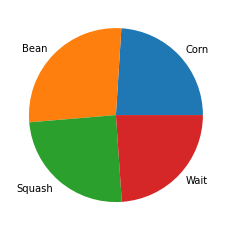

Mean Score: 162.6649798333329
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 73 of 500


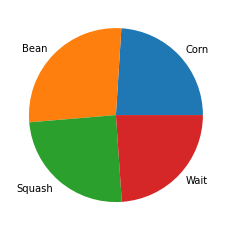

Mean Score: 162.681523333333
Max Score: 164.92000000000002
Min Score: 161.46099999999998
Running generation 74 of 500


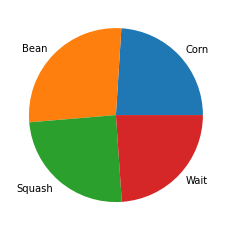

Mean Score: 162.679531333333
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 75 of 500


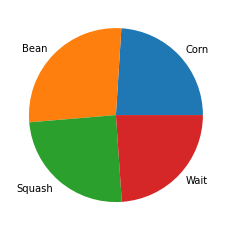

Mean Score: 162.70674749999955
Max Score: 164.92000000000002
Min Score: 161.53440000000003
Running generation 76 of 500


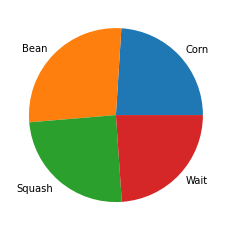

Mean Score: 162.69121799999965
Max Score: 164.92000000000002
Min Score: 161.5029
Running generation 77 of 500


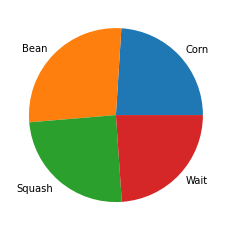

Mean Score: 162.68383666666622
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 78 of 500


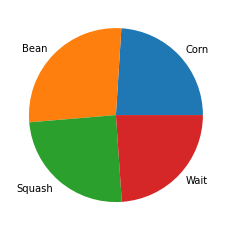

Mean Score: 162.6794566666661
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 79 of 500


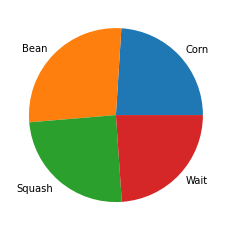

Mean Score: 162.64376713333294
Max Score: 164.92000000000002
Min Score: 161.51000000000002
Running generation 80 of 500


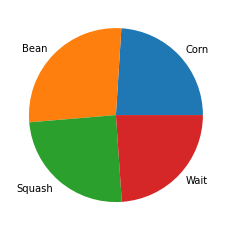

Mean Score: 162.6519899999996
Max Score: 164.92000000000002
Min Score: 161.58900000000003
Running generation 81 of 500


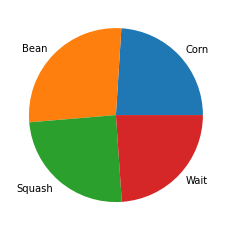

Mean Score: 162.6901099999996
Max Score: 164.92000000000002
Min Score: 161.3
Running generation 82 of 500


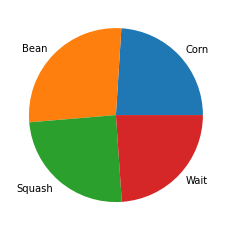

Mean Score: 162.68872999999965
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 83 of 500


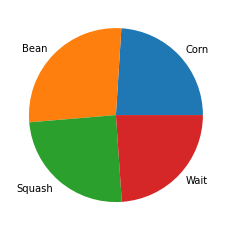

Mean Score: 162.6731166666662
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 84 of 500


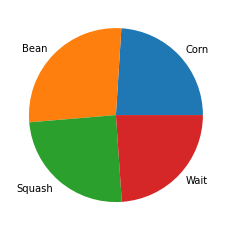

Mean Score: 162.69365599999966
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 85 of 500


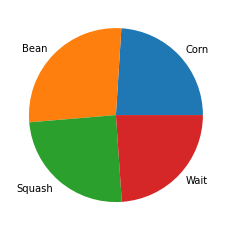

Mean Score: 162.6974254666661
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 86 of 500


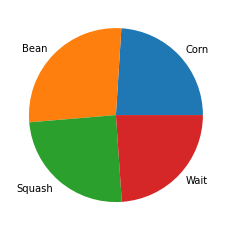

Mean Score: 162.72370333333294
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 87 of 500


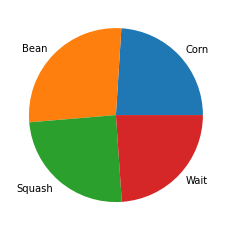

Mean Score: 162.69950599999964
Max Score: 164.92000000000002
Min Score: 161.59000000000003
Running generation 88 of 500


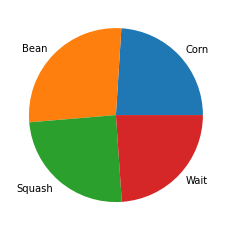

Mean Score: 162.67310999999955
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 89 of 500


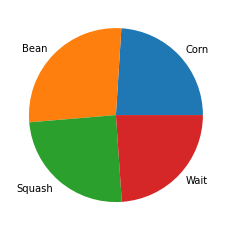

Mean Score: 162.69528119999944
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 90 of 500


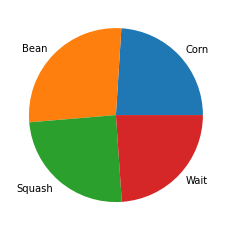

Mean Score: 162.73722133333294
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 91 of 500


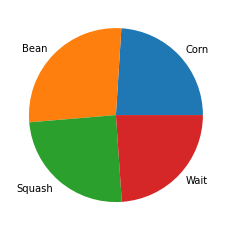

Mean Score: 162.6240099999996
Max Score: 164.92000000000002
Min Score: 161.3
Running generation 92 of 500


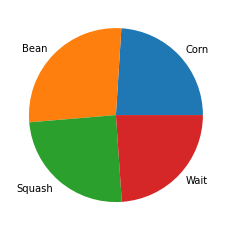

Mean Score: 162.70209866666622
Max Score: 164.92000000000002
Min Score: 161.59290000000001
Running generation 93 of 500


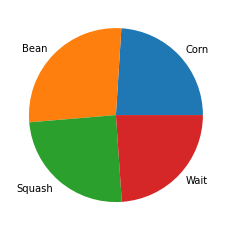

Mean Score: 162.68044599999965
Max Score: 164.92000000000002
Min Score: 160.692
Running generation 94 of 500


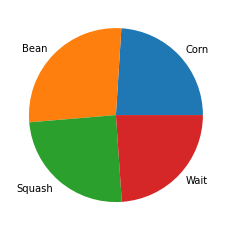

Mean Score: 162.70386999999954
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 95 of 500


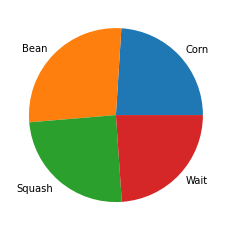

Mean Score: 162.694675333333
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 96 of 500


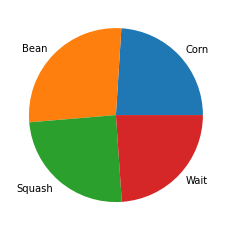

Mean Score: 162.65785666666616
Max Score: 164.92000000000002
Min Score: 161.56500000000003
Running generation 97 of 500


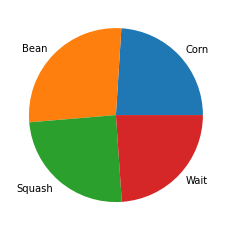

Mean Score: 162.65726333333285
Max Score: 164.92000000000002
Min Score: 161.58
Running generation 98 of 500


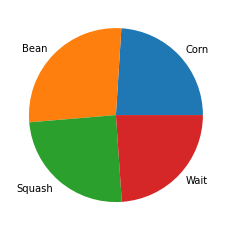

Mean Score: 162.64425333333293
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 99 of 500


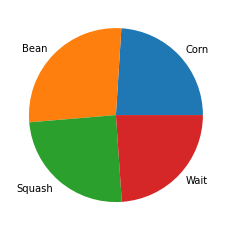

Mean Score: 162.6880399999997
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 100 of 500


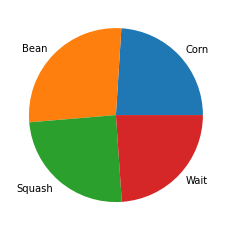

Mean Score: 162.64616033333294
Max Score: 164.92000000000002
Min Score: 160.591
Running generation 101 of 500


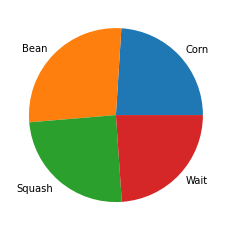

Mean Score: 162.67912966666614
Max Score: 164.92000000000002
Min Score: 160.782
Running generation 102 of 500


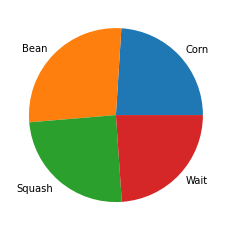

Mean Score: 162.65535366666631
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 103 of 500


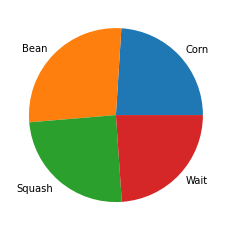

Mean Score: 162.69412013333297
Max Score: 164.92000000000002
Min Score: 161.53440000000003
Running generation 104 of 500


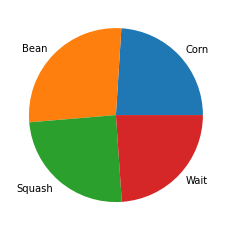

Mean Score: 162.6542516666662
Max Score: 164.92000000000002
Min Score: 161.3
Running generation 105 of 500


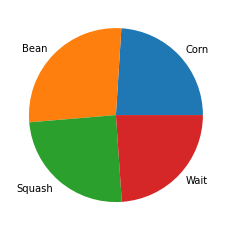

Mean Score: 162.66112666666643
Max Score: 164.92000000000002
Min Score: 161.5569
Running generation 106 of 500


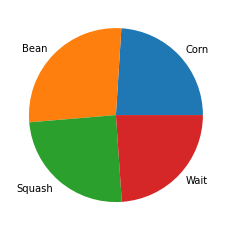

Mean Score: 162.67945633333287
Max Score: 164.92000000000002
Min Score: 161.5029
Running generation 107 of 500


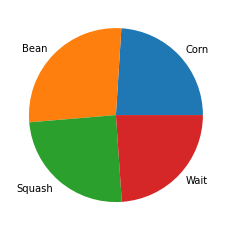

Mean Score: 162.68162833333278
Max Score: 164.92000000000002
Min Score: 161.51000000000002
Running generation 108 of 500


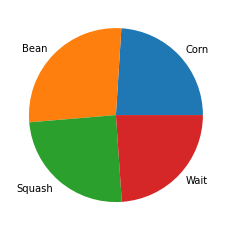

Mean Score: 162.65868999999964
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 109 of 500


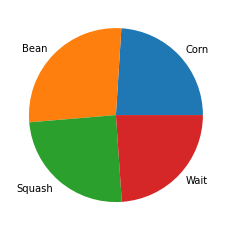

Mean Score: 162.68739463333296
Max Score: 164.92000000000002
Min Score: 161.52729000000002
Running generation 110 of 500


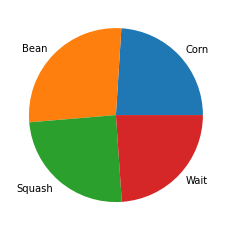

Mean Score: 162.68176366666643
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 111 of 500


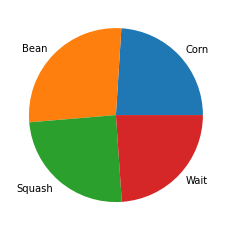

Mean Score: 162.64246666666614
Max Score: 164.92000000000002
Min Score: 160.782
Running generation 112 of 500


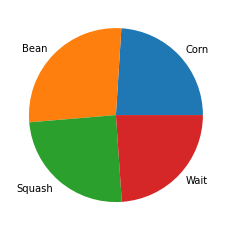

Mean Score: 162.71300999999957
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 113 of 500


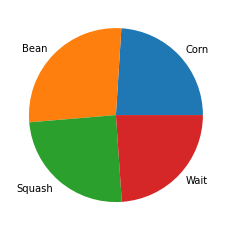

Mean Score: 162.6733613333329
Max Score: 164.92000000000002
Min Score: 161.59000000000003
Running generation 114 of 500


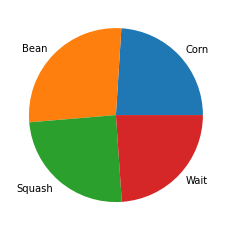

Mean Score: 162.67688999999956
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 115 of 500


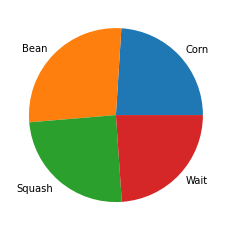

Mean Score: 162.680164633333
Max Score: 164.92000000000002
Min Score: 160.70000000000002
Running generation 116 of 500


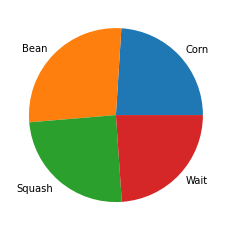

Mean Score: 162.69869799999958
Max Score: 164.92000000000002
Min Score: 161.59000000000003
Running generation 117 of 500


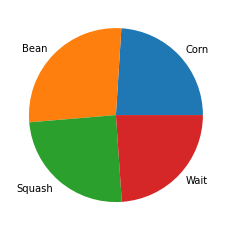

Mean Score: 162.65415886666617
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 118 of 500


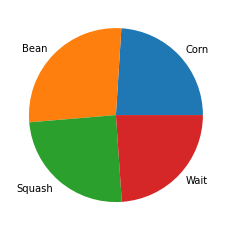

Mean Score: 162.65600703333303
Max Score: 164.92000000000002
Min Score: 161.58561000000003
Running generation 119 of 500


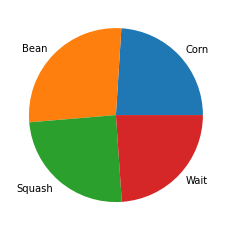

Mean Score: 162.6823153666663
Max Score: 164.92000000000002
Min Score: 161.52900000000002
Running generation 120 of 500


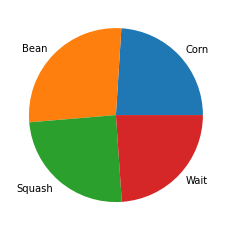

Mean Score: 162.712145963333
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 121 of 500


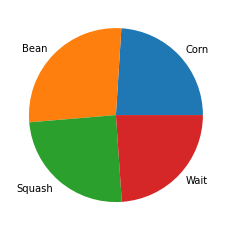

Mean Score: 162.6942593333331
Max Score: 164.92000000000002
Min Score: 161.58
Running generation 122 of 500


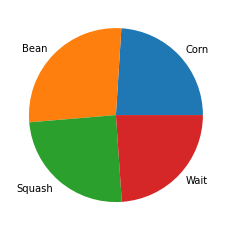

Mean Score: 162.69168333333306
Max Score: 164.92000000000002
Min Score: 161.32200000000003
Running generation 123 of 500


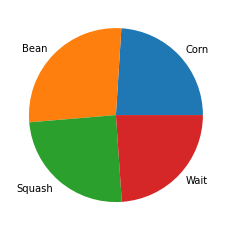

Mean Score: 162.6903499999996
Max Score: 164.92000000000002
Min Score: 161.60100000000003
Running generation 124 of 500


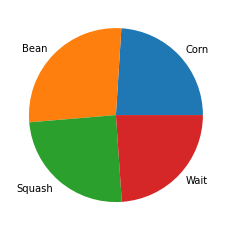

Mean Score: 162.70063466666622
Max Score: 164.92000000000002
Min Score: 161.61
Running generation 125 of 500


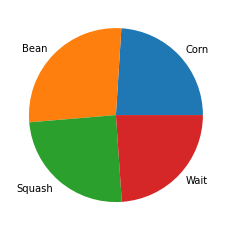

Mean Score: 162.58206236666618
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 126 of 500


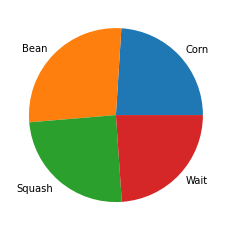

Mean Score: 162.66292333333288
Max Score: 164.92000000000002
Min Score: 161.3
Running generation 127 of 500


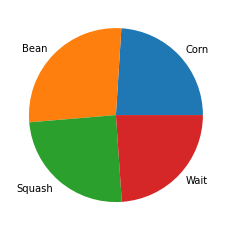

Mean Score: 162.65802736666603
Max Score: 164.92000000000002
Min Score: 161.58561000000003
Running generation 128 of 500


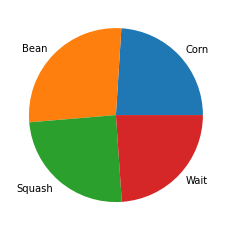

Mean Score: 162.6697591333329
Max Score: 164.92000000000002
Min Score: 161.57000000000002
Running generation 129 of 500


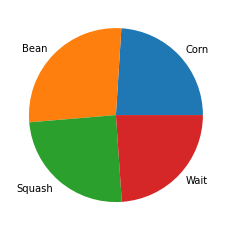

Mean Score: 162.67254333333304
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 130 of 500


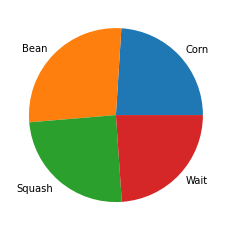

Mean Score: 162.69517899999968
Max Score: 165.52
Min Score: 161.3
Running generation 131 of 500


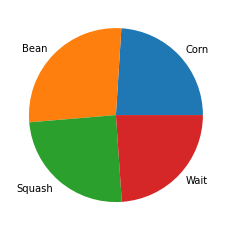

Mean Score: 162.7051089999997
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 132 of 500


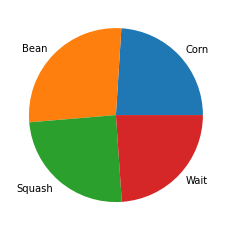

Mean Score: 162.70597033333286
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 133 of 500


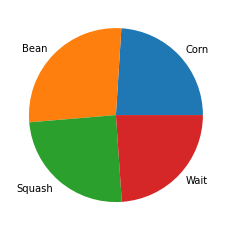

Mean Score: 162.6581483333329
Max Score: 165.52
Min Score: 161.61
Running generation 134 of 500


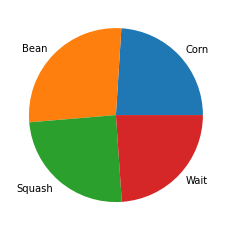

Mean Score: 162.6691733333329
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 135 of 500


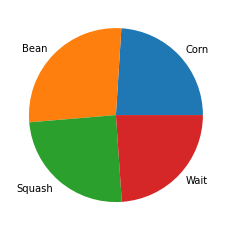

Mean Score: 162.68929299999954
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 136 of 500


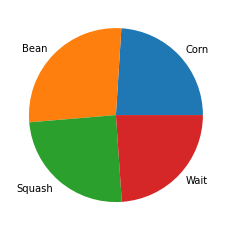

Mean Score: 162.66465033333293
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 137 of 500


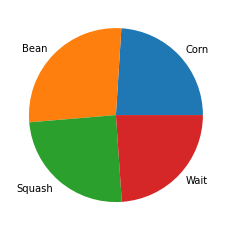

Mean Score: 162.6870199999996
Max Score: 165.52
Min Score: 161.61
Running generation 138 of 500


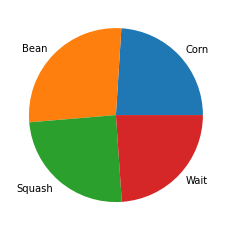

Mean Score: 162.65068366666634
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 139 of 500


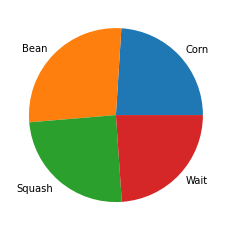

Mean Score: 162.70346133333285
Max Score: 165.52
Min Score: 161.53600000000003
Running generation 140 of 500


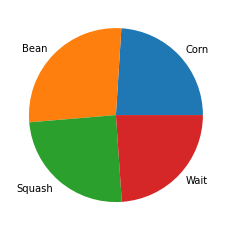

Mean Score: 162.71549833333302
Max Score: 165.52
Min Score: 161.5029
Running generation 141 of 500


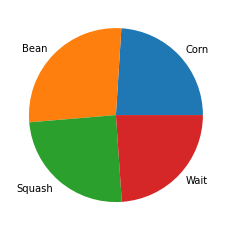

Mean Score: 162.6134066666663
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 142 of 500


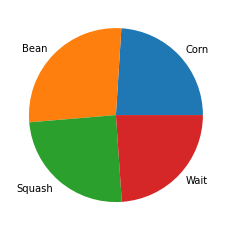

Mean Score: 162.67750199999946
Max Score: 165.52
Min Score: 161.5569
Running generation 143 of 500


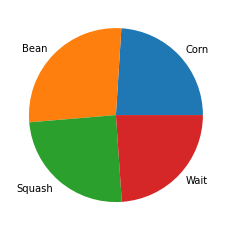

Mean Score: 162.65991333333298
Max Score: 165.52
Min Score: 161.58300000000003
Running generation 144 of 500


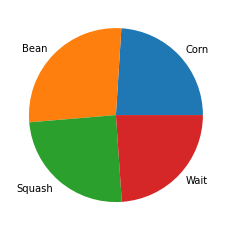

Mean Score: 162.71072333333305
Max Score: 165.52
Min Score: 161.3
Running generation 145 of 500


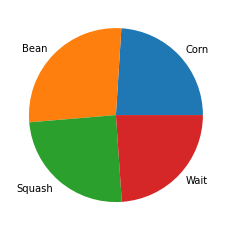

Mean Score: 162.66003166666624
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 146 of 500


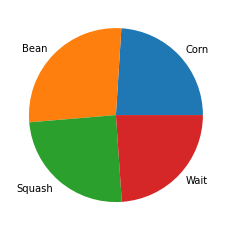

Mean Score: 162.6653363333329
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 147 of 500


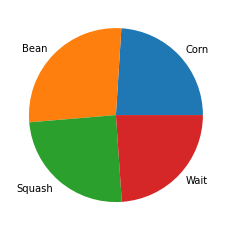

Mean Score: 162.67099799999954
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 148 of 500


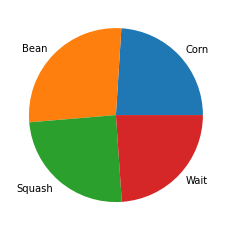

Mean Score: 162.7128166666664
Max Score: 165.52
Min Score: 161.61
Running generation 149 of 500


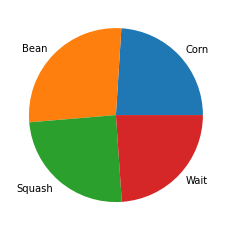

Mean Score: 162.69097799999963
Max Score: 165.52
Min Score: 161.3
Running generation 150 of 500


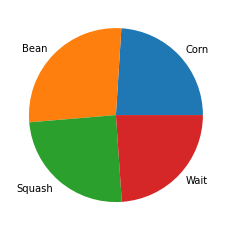

Mean Score: 162.68935333333312
Max Score: 165.52
Min Score: 161.61
Running generation 151 of 500


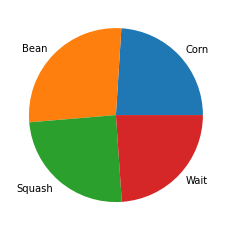

Mean Score: 162.65643249999965
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 152 of 500


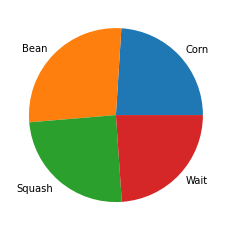

Mean Score: 162.70717666666633
Max Score: 165.52
Min Score: 161.61
Running generation 153 of 500


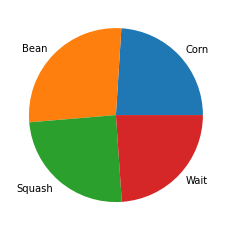

Mean Score: 162.67551666666623
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 154 of 500


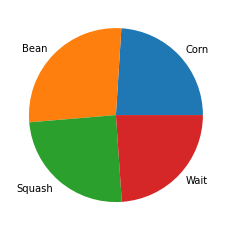

Mean Score: 162.69065069999948
Max Score: 165.52
Min Score: 161.3
Running generation 155 of 500


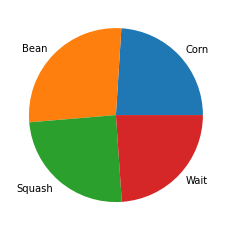

Mean Score: 162.68577333333283
Max Score: 165.52
Min Score: 160.59100000000004
Running generation 156 of 500


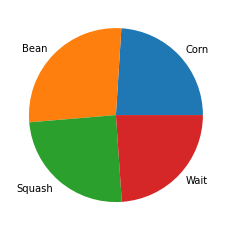

Mean Score: 162.69629666666629
Max Score: 165.52
Min Score: 161.50100000000003
Running generation 157 of 500


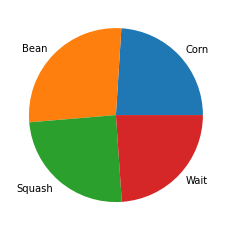

Mean Score: 162.6826420666664
Max Score: 165.52
Min Score: 161.53440000000003
Running generation 158 of 500


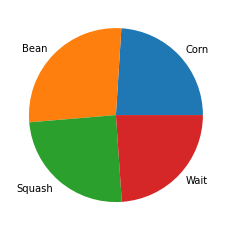

Mean Score: 162.6766516666661
Max Score: 165.52
Min Score: 161.53440000000003
Running generation 159 of 500


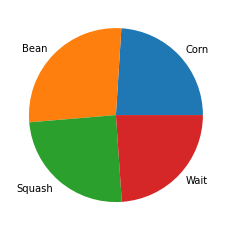

Mean Score: 162.66340669999974
Max Score: 165.52
Min Score: 161.3
Running generation 160 of 500


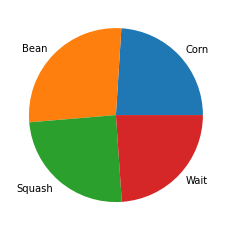

Mean Score: 162.69359333333287
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 161 of 500


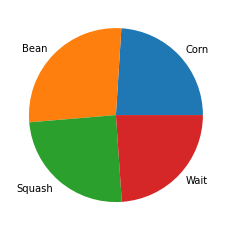

Mean Score: 162.68007366666632
Max Score: 165.52
Min Score: 161.61
Running generation 162 of 500


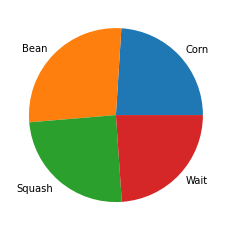

Mean Score: 162.63115133333275
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 163 of 500


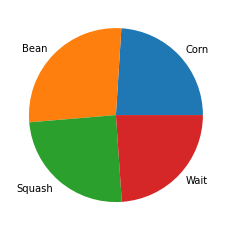

Mean Score: 162.66574833333294
Max Score: 165.52
Min Score: 161.3
Running generation 164 of 500


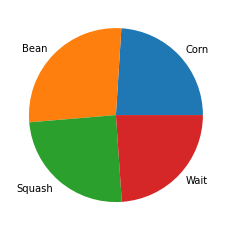

Mean Score: 162.63512226666612
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 165 of 500


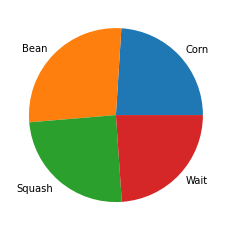

Mean Score: 162.70678816666612
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 166 of 500


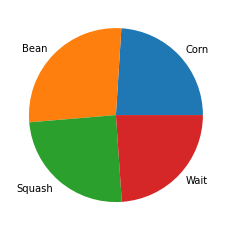

Mean Score: 162.66913633333297
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 167 of 500


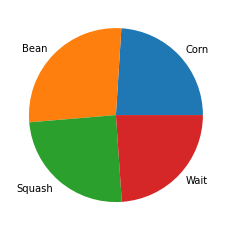

Mean Score: 162.67459333333287
Max Score: 165.52
Min Score: 161.61
Running generation 168 of 500


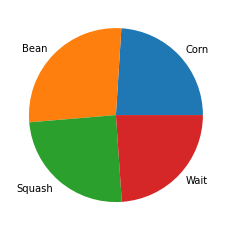

Mean Score: 162.7480386666664
Max Score: 165.52
Min Score: 161.62000000000003
Running generation 169 of 500


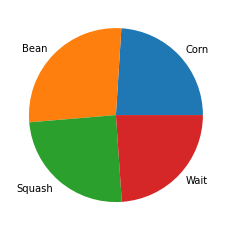

Mean Score: 162.70811999999967
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 170 of 500


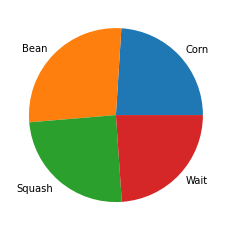

Mean Score: 162.68545999999967
Max Score: 165.52
Min Score: 161.50100000000003
Running generation 171 of 500


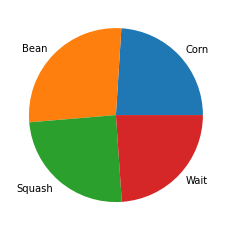

Mean Score: 162.69664466666634
Max Score: 165.52
Min Score: 160.591
Running generation 172 of 500


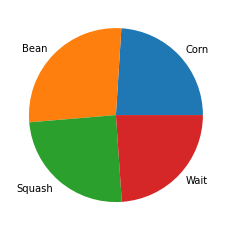

Mean Score: 162.71705866666633
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 173 of 500


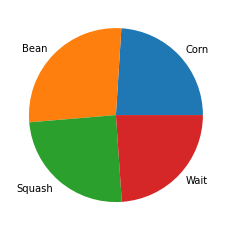

Mean Score: 162.70537333333297
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 174 of 500


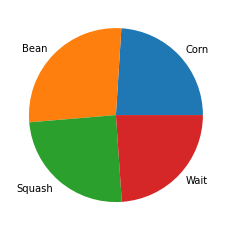

Mean Score: 162.7081033333329
Max Score: 165.52
Min Score: 161.61
Running generation 175 of 500


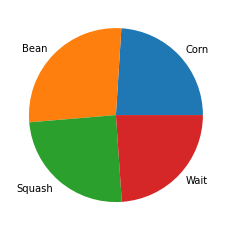

Mean Score: 162.69154866666636
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 176 of 500


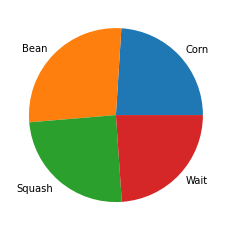

Mean Score: 162.71227536666626
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 177 of 500


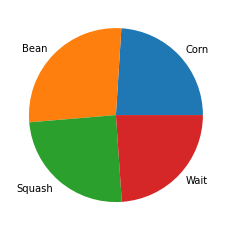

Mean Score: 162.70378166666623
Max Score: 165.52
Min Score: 161.50100000000003
Running generation 178 of 500


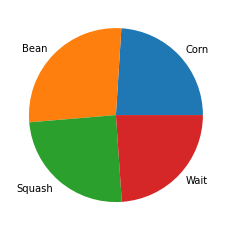

Mean Score: 162.70169866666626
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 179 of 500


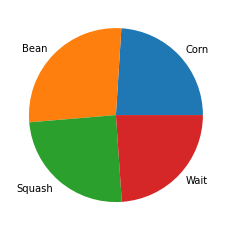

Mean Score: 162.70639666666634
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 180 of 500


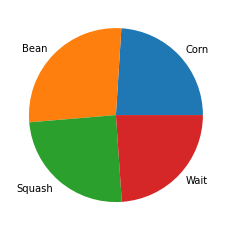

Mean Score: 162.6678999999995
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 181 of 500


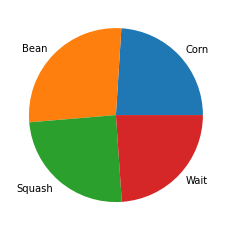

Mean Score: 162.70435666666637
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 182 of 500


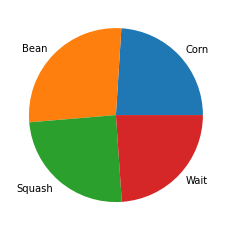

Mean Score: 162.69446496666615
Max Score: 165.52
Min Score: 160.782
Running generation 183 of 500


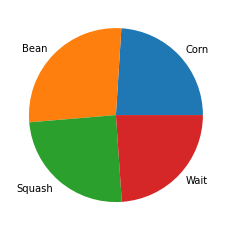

Mean Score: 162.6970203333329
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 184 of 500


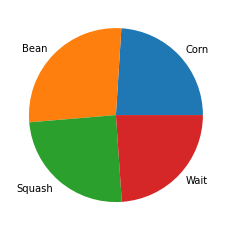

Mean Score: 162.67974433333308
Max Score: 165.52
Min Score: 161.58210000000003
Running generation 185 of 500


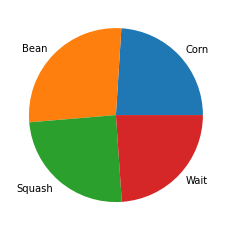

Mean Score: 162.72309866666637
Max Score: 165.52
Min Score: 161.3
Running generation 186 of 500


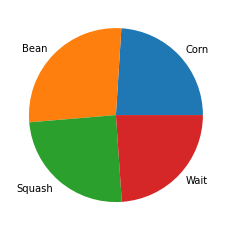

Mean Score: 162.68912999999958
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 187 of 500


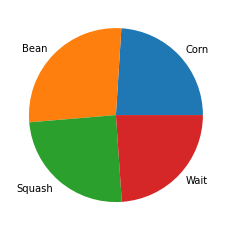

Mean Score: 162.71100799999948
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 188 of 500


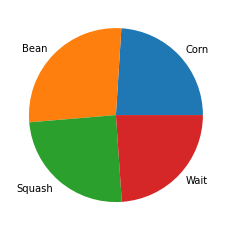

Mean Score: 162.67838669999955
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 189 of 500


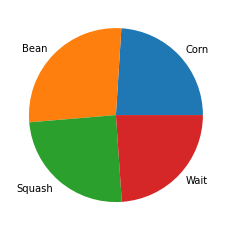

Mean Score: 162.72132999999965
Max Score: 165.52
Min Score: 161.50100000000003
Running generation 190 of 500


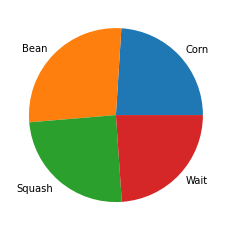

Mean Score: 162.6849379999996
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 191 of 500


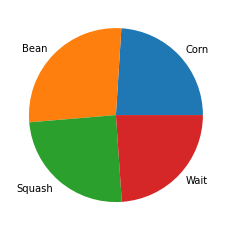

Mean Score: 162.67222096666634
Max Score: 165.52
Min Score: 161.52729000000002
Running generation 192 of 500


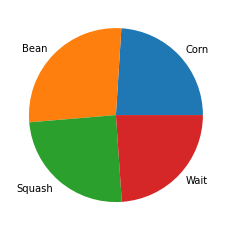

Mean Score: 162.72693633333296
Max Score: 165.52
Min Score: 160.782
Running generation 193 of 500


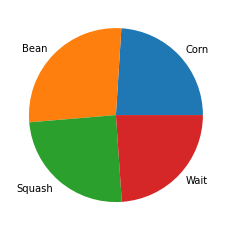

Mean Score: 162.68391699999964
Max Score: 165.52
Min Score: 161.52810000000002
Running generation 194 of 500


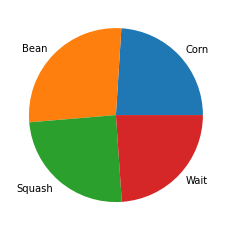

Mean Score: 162.69227099999964
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 195 of 500


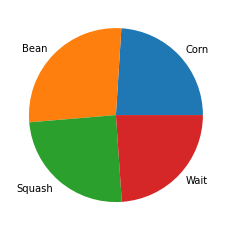

Mean Score: 162.69108033333285
Max Score: 165.52
Min Score: 161.61
Running generation 196 of 500


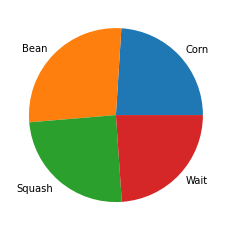

Mean Score: 162.67378666666625
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 197 of 500


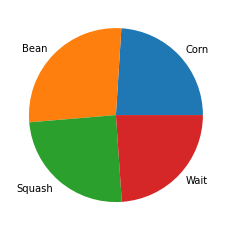

Mean Score: 162.68244999999962
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 198 of 500


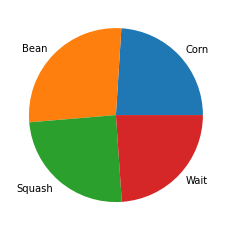

Mean Score: 162.71741869999954
Max Score: 165.52
Min Score: 161.32200000000003
Running generation 199 of 500


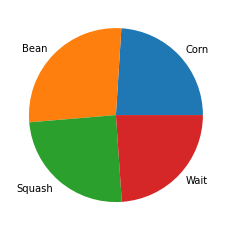

Mean Score: 162.72262536666622
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 200 of 500


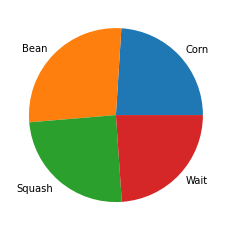

Mean Score: 162.62047733333284
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 201 of 500


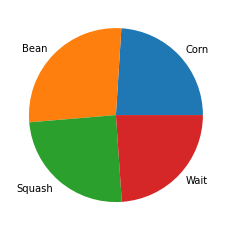

Mean Score: 162.67442999999955
Max Score: 165.52
Min Score: 161.61
Running generation 202 of 500


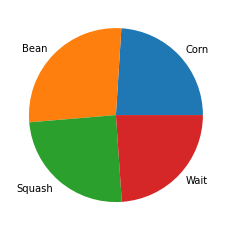

Mean Score: 162.74231333333285
Max Score: 165.52
Min Score: 161.61
Running generation 203 of 500


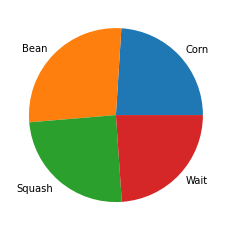

Mean Score: 162.66791325333296
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 204 of 500


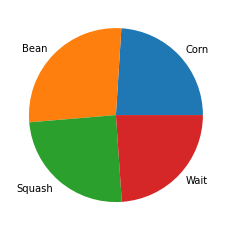

Mean Score: 162.72539633333298
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 205 of 500


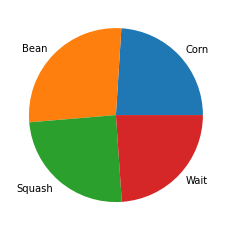

Mean Score: 162.7099686999996
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 206 of 500


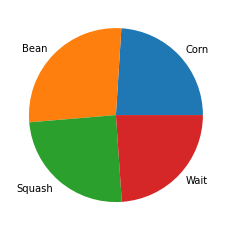

Mean Score: 162.69465099999962
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 207 of 500


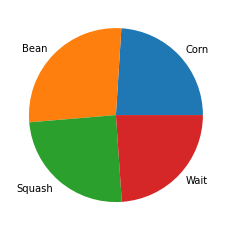

Mean Score: 162.72233666666634
Max Score: 165.52
Min Score: 161.58
Running generation 208 of 500


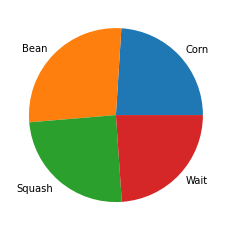

Mean Score: 162.66249366666628
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 209 of 500


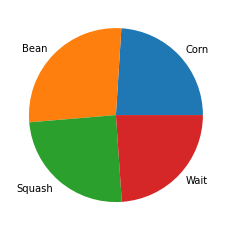

Mean Score: 162.68436999999946
Max Score: 165.52
Min Score: 161.61
Running generation 210 of 500


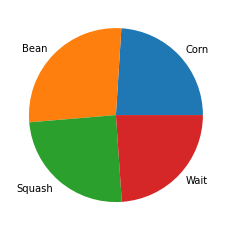

Mean Score: 162.69578666666624
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 211 of 500


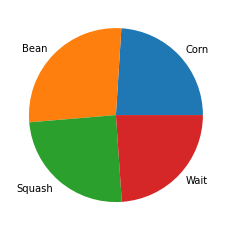

Mean Score: 162.65154049999967
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 212 of 500


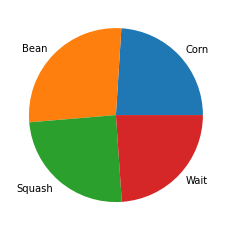

Mean Score: 162.70278633333294
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 213 of 500


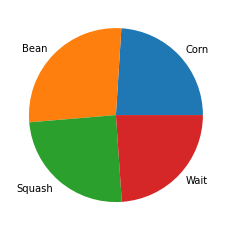

Mean Score: 162.65553536666621
Max Score: 165.52
Min Score: 161.3
Running generation 214 of 500


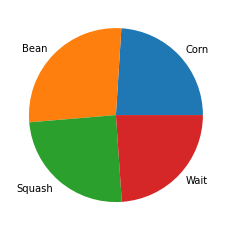

Mean Score: 162.71661833333303
Max Score: 165.52
Min Score: 161.58900000000003
Running generation 215 of 500


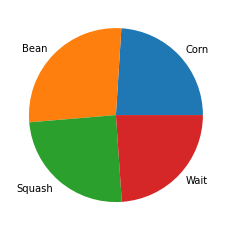

Mean Score: 162.72546369999955
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 216 of 500


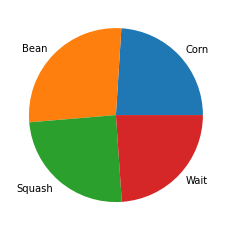

Mean Score: 162.66971999999964
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 217 of 500


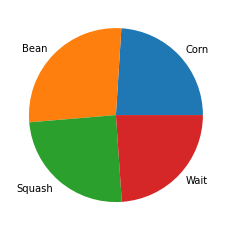

Mean Score: 162.65179799999947
Max Score: 165.52
Min Score: 160.782
Running generation 218 of 500


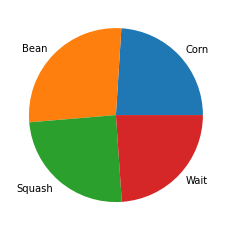

Mean Score: 162.6782866666662
Max Score: 165.52
Min Score: 161.59600000000003
Running generation 219 of 500


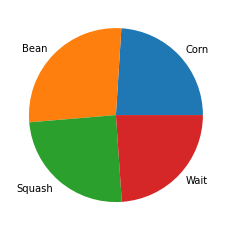

Mean Score: 162.68946333333307
Max Score: 165.52
Min Score: 161.3
Running generation 220 of 500


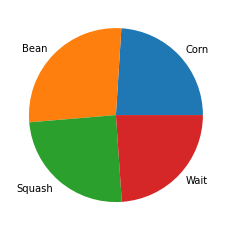

Mean Score: 162.66206699999955
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 221 of 500


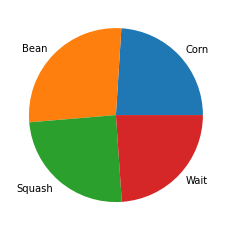

Mean Score: 162.71149699999955
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 222 of 500


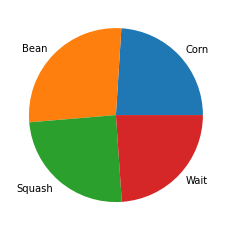

Mean Score: 162.71886266666638
Max Score: 165.52
Min Score: 160.692
Running generation 223 of 500


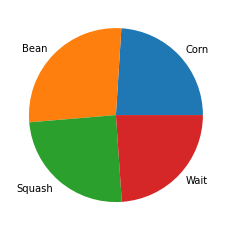

Mean Score: 162.6738286666662
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 224 of 500


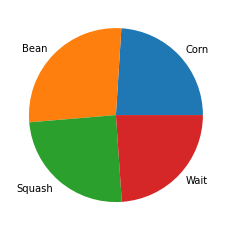

Mean Score: 162.65983699999958
Max Score: 165.52
Min Score: 161.61
Running generation 225 of 500


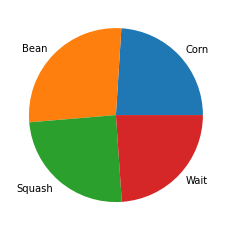

Mean Score: 162.70496333333284
Max Score: 165.52
Min Score: 161.3
Running generation 226 of 500


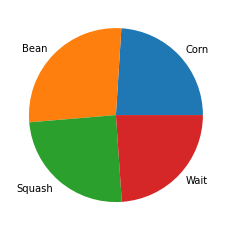

Mean Score: 162.70601869999985
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 227 of 500


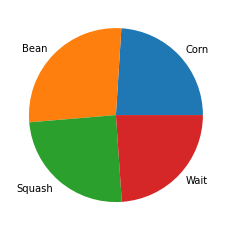

Mean Score: 162.69733379999974
Max Score: 165.52
Min Score: 161.58
Running generation 228 of 500


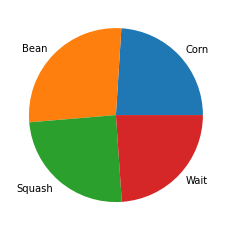

Mean Score: 162.65786213333286
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 229 of 500


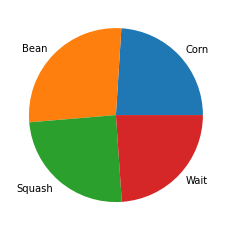

Mean Score: 162.67588799999956
Max Score: 165.52
Min Score: 161.3
Running generation 230 of 500


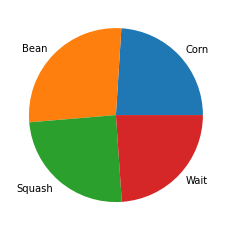

Mean Score: 162.67679299999946
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 231 of 500


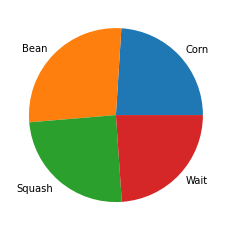

Mean Score: 162.67336999999952
Max Score: 165.52
Min Score: 161.3
Running generation 232 of 500


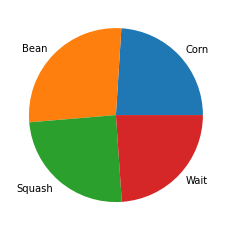

Mean Score: 162.6245833333329
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 233 of 500


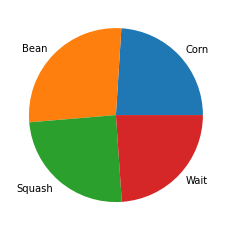

Mean Score: 162.65150699999958
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 234 of 500


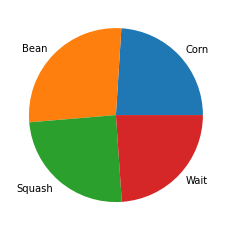

Mean Score: 162.65717366666624
Max Score: 165.52
Min Score: 161.3
Running generation 235 of 500


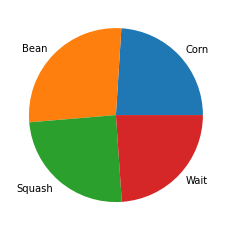

Mean Score: 162.67490666666632
Max Score: 165.52
Min Score: 161.3
Running generation 236 of 500


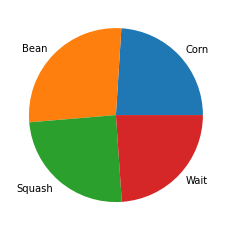

Mean Score: 162.68270899999956
Max Score: 165.52
Min Score: 161.58900000000003
Running generation 237 of 500


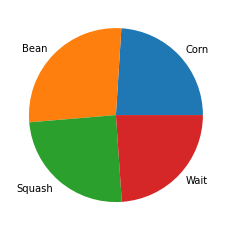

Mean Score: 162.68057666666624
Max Score: 165.52
Min Score: 161.59600000000003
Running generation 238 of 500


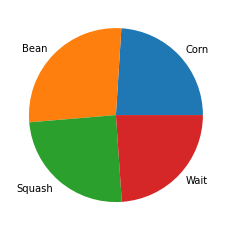

Mean Score: 162.6942549999996
Max Score: 165.52
Min Score: 161.58210000000003
Running generation 239 of 500


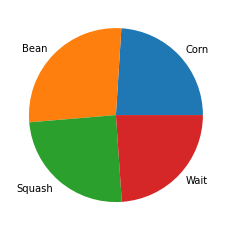

Mean Score: 162.69949866666627
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 240 of 500


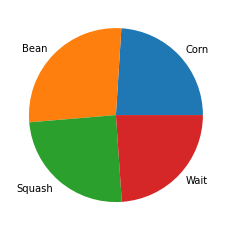

Mean Score: 162.6527369999996
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 241 of 500


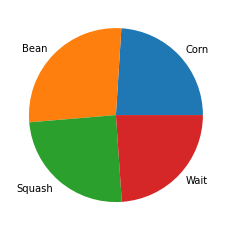

Mean Score: 162.6800739999997
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 242 of 500


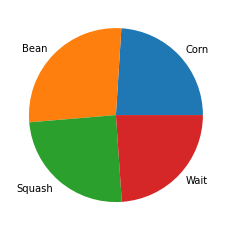

Mean Score: 162.6838749999994
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 243 of 500


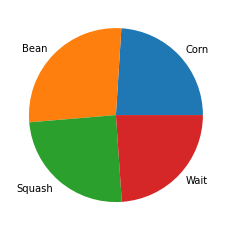

Mean Score: 162.71911699999964
Max Score: 165.52
Min Score: 161.61
Running generation 244 of 500


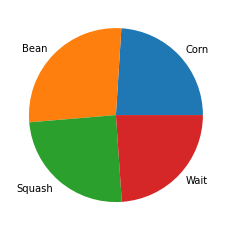

Mean Score: 162.73714466666638
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 245 of 500


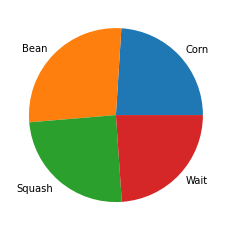

Mean Score: 162.65532799999954
Max Score: 165.52
Min Score: 160.591
Running generation 246 of 500


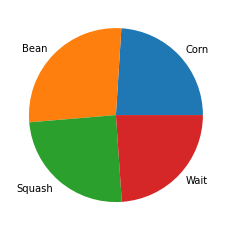

Mean Score: 162.7101099999997
Max Score: 165.52
Min Score: 160.692
Running generation 247 of 500


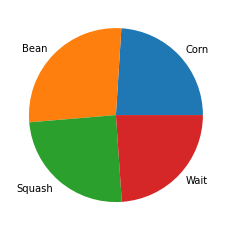

Mean Score: 162.66478299999952
Max Score: 165.52
Min Score: 161.53600000000003
Running generation 248 of 500


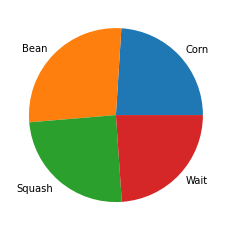

Mean Score: 162.72376799999947
Max Score: 165.52
Min Score: 161.61
Running generation 249 of 500


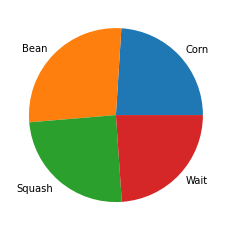

Mean Score: 162.706095333333
Max Score: 165.52
Min Score: 161.53440000000003
Running generation 250 of 500


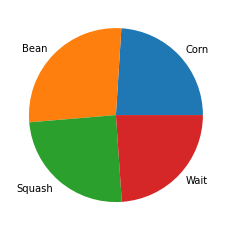

Mean Score: 162.66888333333299
Max Score: 165.52
Min Score: 161.53440000000003
Running generation 251 of 500


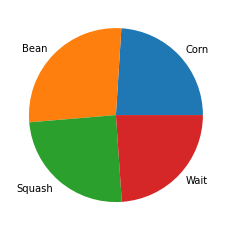

Mean Score: 162.70104366666612
Max Score: 165.52
Min Score: 160.692
Running generation 252 of 500


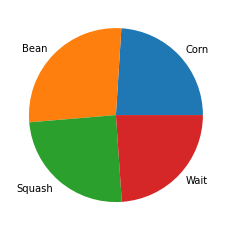

Mean Score: 162.69251333333293
Max Score: 165.52
Min Score: 161.61
Running generation 253 of 500


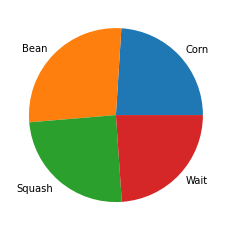

Mean Score: 162.65985699999956
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 254 of 500


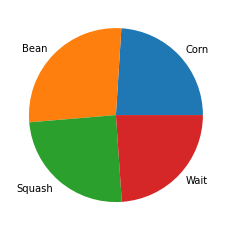

Mean Score: 162.67264325333284
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 255 of 500


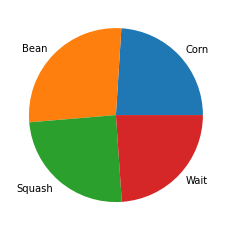

Mean Score: 162.70645333333297
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 256 of 500


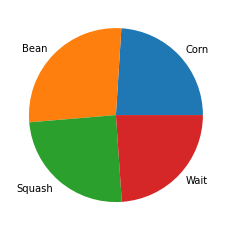

Mean Score: 162.65877999999967
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 257 of 500


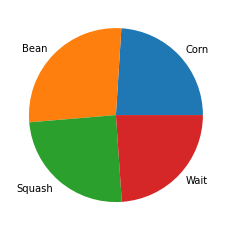

Mean Score: 162.69811166666625
Max Score: 165.52
Min Score: 161.53440000000003
Running generation 258 of 500


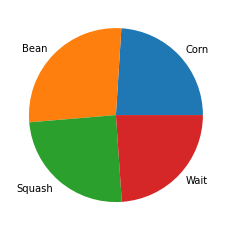

Mean Score: 162.6582396666662
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 259 of 500


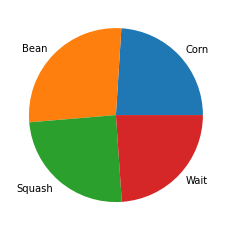

Mean Score: 162.6999154666664
Max Score: 165.52
Min Score: 160.591
Running generation 260 of 500


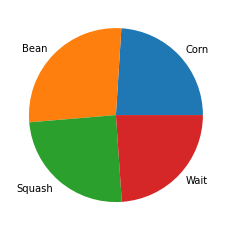

Mean Score: 162.69718366666626
Max Score: 165.52
Min Score: 161.61
Running generation 261 of 500


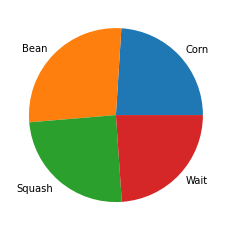

Mean Score: 162.68977666666623
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 262 of 500


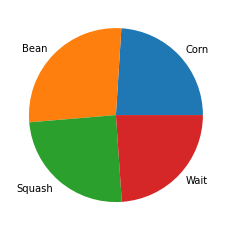

Mean Score: 162.67470999999958
Max Score: 165.52
Min Score: 160.59100000000004
Running generation 263 of 500


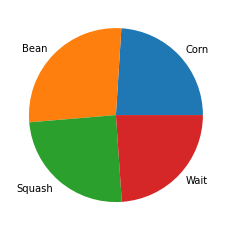

Mean Score: 162.6667249999997
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 264 of 500


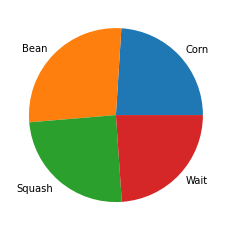

Mean Score: 162.70664333333303
Max Score: 165.52
Min Score: 161.61
Running generation 265 of 500


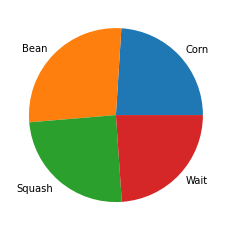

Mean Score: 162.67226466666636
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 266 of 500


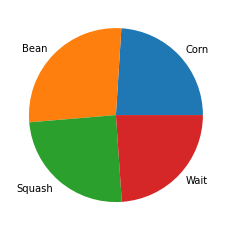

Mean Score: 162.69809366666624
Max Score: 165.52
Min Score: 160.782
Running generation 267 of 500


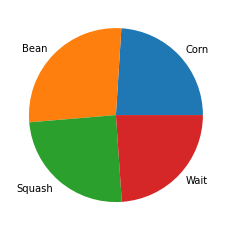

Mean Score: 162.71774666666622
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 268 of 500


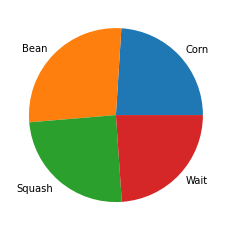

Mean Score: 162.6643021333329
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 269 of 500


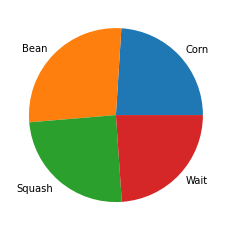

Mean Score: 162.69927166666636
Max Score: 165.52
Min Score: 161.3
Running generation 270 of 500


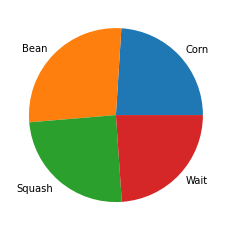

Mean Score: 162.68849423333296
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 271 of 500


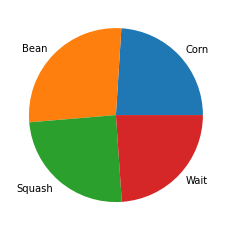

Mean Score: 162.7186516666664
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 272 of 500


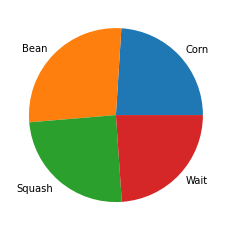

Mean Score: 162.68419866666633
Max Score: 165.52
Min Score: 161.53350000000003
Running generation 273 of 500


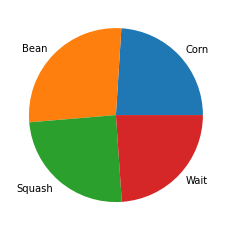

Mean Score: 162.7154769999996
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 274 of 500


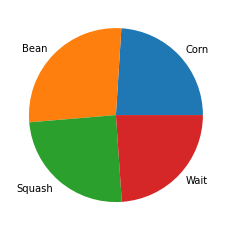

Mean Score: 162.6948736666662
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 275 of 500


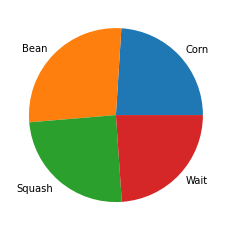

Mean Score: 162.68039999999954
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 276 of 500


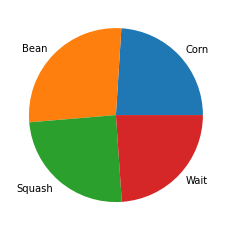

Mean Score: 162.67282733333286
Max Score: 165.52
Min Score: 161.52810000000002
Running generation 277 of 500


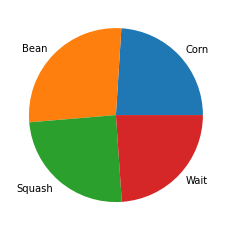

Mean Score: 162.71111386666632
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 278 of 500


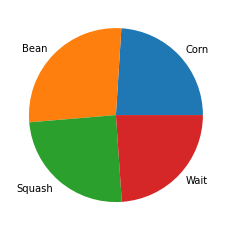

Mean Score: 162.6619467999995
Max Score: 165.52
Min Score: 161.32200000000003
Running generation 279 of 500


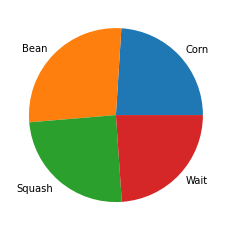

Mean Score: 162.72360666666614
Max Score: 165.52
Min Score: 161.56500000000003
Running generation 280 of 500


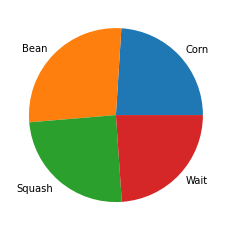

Mean Score: 162.67002390333286
Max Score: 165.52
Min Score: 161.52656100000002
Running generation 281 of 500


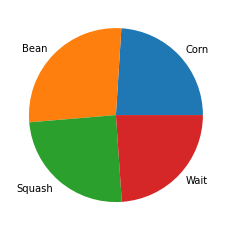

Mean Score: 162.67121933333286
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 282 of 500


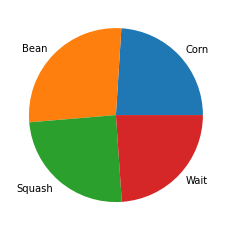

Mean Score: 162.70933866666635
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 283 of 500


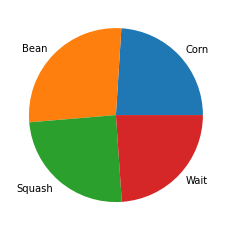

Mean Score: 162.67978166666626
Max Score: 165.52
Min Score: 161.61
Running generation 284 of 500


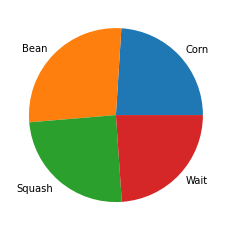

Mean Score: 162.69551166666625
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 285 of 500


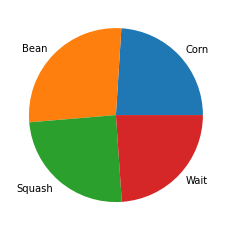

Mean Score: 162.73995333333295
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 286 of 500


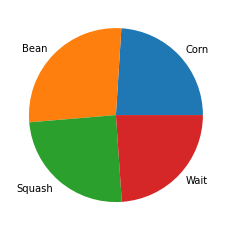

Mean Score: 162.62404899999953
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 287 of 500


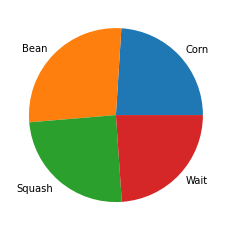

Mean Score: 162.6762983666662
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 288 of 500


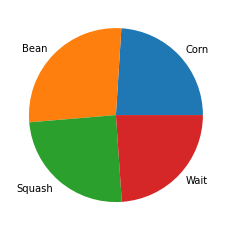

Mean Score: 162.69399333333303
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 289 of 500


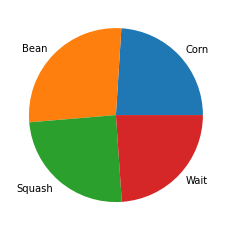

Mean Score: 162.64992713333285
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 290 of 500


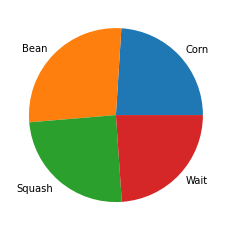

Mean Score: 162.70549166666626
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 291 of 500


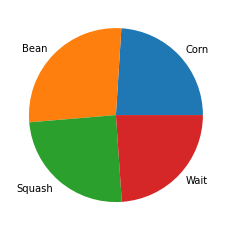

Mean Score: 162.6912729999997
Max Score: 165.52
Min Score: 161.59600000000003
Running generation 292 of 500


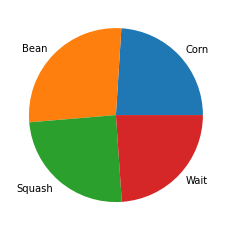

Mean Score: 162.691669333333
Max Score: 165.52
Min Score: 161.61
Running generation 293 of 500


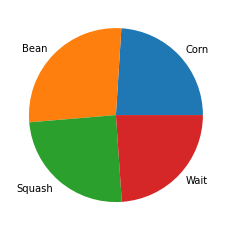

Mean Score: 162.70823366666622
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 294 of 500


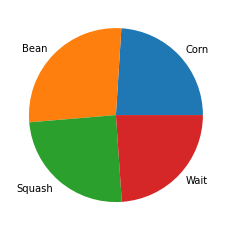

Mean Score: 162.6873946666663
Max Score: 165.52
Min Score: 161.3
Running generation 295 of 500


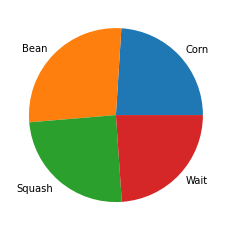

Mean Score: 162.6408263333327
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 296 of 500


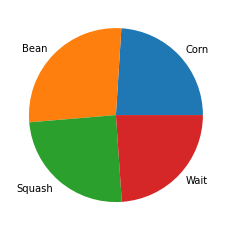

Mean Score: 162.69252999999955
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 297 of 500


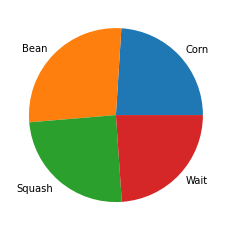

Mean Score: 162.70143999999968
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 298 of 500


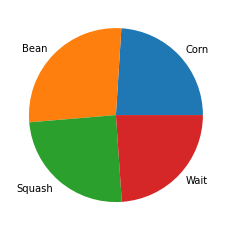

Mean Score: 162.71353033333293
Max Score: 165.52
Min Score: 161.58210000000003
Running generation 299 of 500


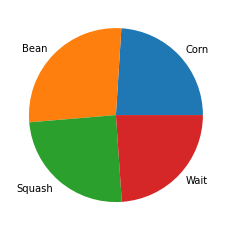

Mean Score: 162.69564133333301
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 300 of 500


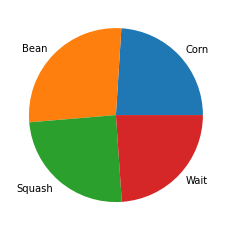

Mean Score: 162.70334033333302
Max Score: 165.52
Min Score: 161.53000000000003
Running generation 301 of 500


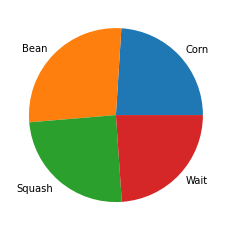

Mean Score: 162.71166366666617
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 302 of 500


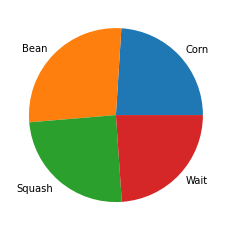

Mean Score: 162.70181099999957
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 303 of 500


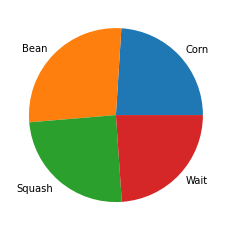

Mean Score: 162.6687217999997
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 304 of 500


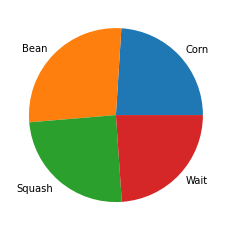

Mean Score: 162.65925099999941
Max Score: 165.52
Min Score: 160.782
Running generation 305 of 500


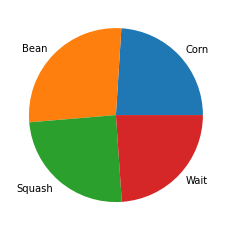

Mean Score: 162.65609469999956
Max Score: 165.52
Min Score: 161.52
Running generation 306 of 500


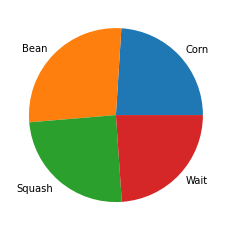

Mean Score: 162.70104799999964
Max Score: 165.52
Min Score: 161.52
Running generation 307 of 500


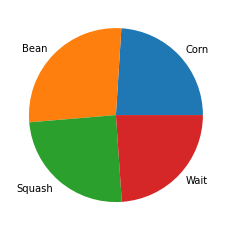

Mean Score: 162.70222033333297
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 308 of 500


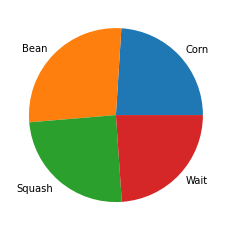

Mean Score: 162.69316666666617
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 309 of 500


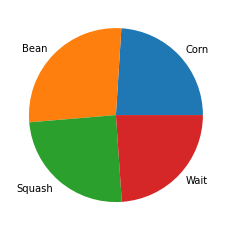

Mean Score: 162.71304799999967
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 310 of 500


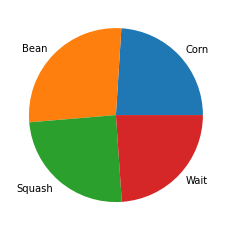

Mean Score: 162.71380366666622
Max Score: 165.52
Min Score: 161.61
Running generation 311 of 500


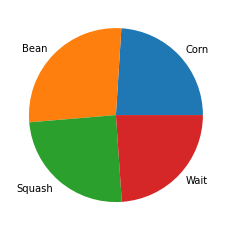

Mean Score: 162.69745699999967
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 312 of 500


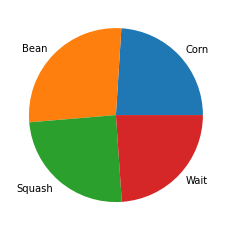

Mean Score: 162.67881999999952
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 313 of 500


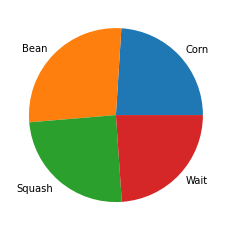

Mean Score: 162.67300069999965
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 314 of 500


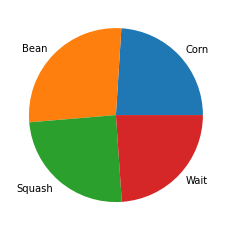

Mean Score: 162.70009766666615
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 315 of 500


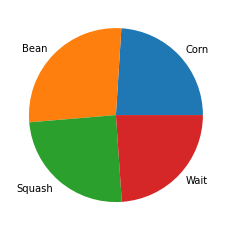

Mean Score: 162.6880299999995
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 316 of 500


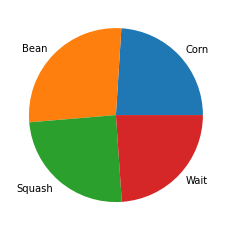

Mean Score: 162.6985466666661
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 317 of 500


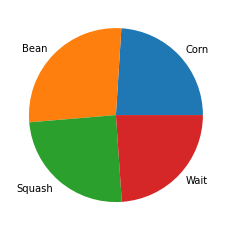

Mean Score: 162.6580536999996
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 318 of 500


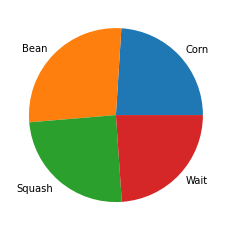

Mean Score: 162.7264699999998
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 319 of 500


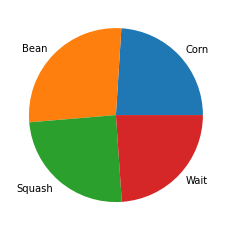

Mean Score: 162.62805793333288
Max Score: 165.52
Min Score: 161.52
Running generation 320 of 500


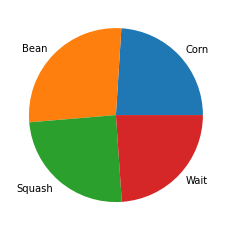

Mean Score: 162.6634136666662
Max Score: 165.52
Min Score: 161.61
Running generation 321 of 500


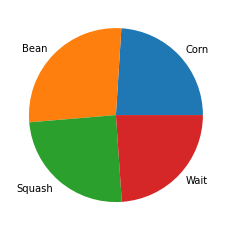

Mean Score: 162.72354116666622
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 322 of 500


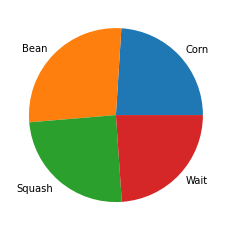

Mean Score: 162.69766899999965
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 323 of 500


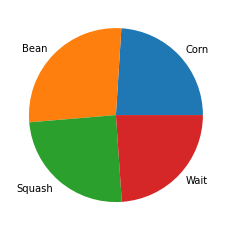

Mean Score: 162.7097203333331
Max Score: 165.52
Min Score: 161.59600000000003
Running generation 324 of 500


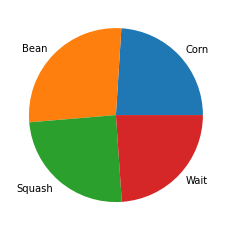

Mean Score: 162.69399466666638
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 325 of 500


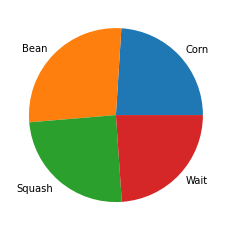

Mean Score: 162.65851991999958
Max Score: 165.52
Min Score: 160.692
Running generation 326 of 500


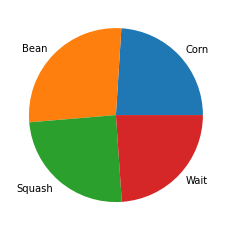

Mean Score: 162.66803869999953
Max Score: 165.52
Min Score: 161.3
Running generation 327 of 500


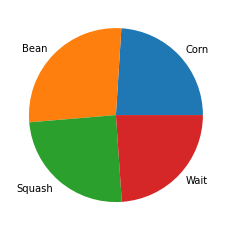

Mean Score: 162.73346036666632
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 328 of 500


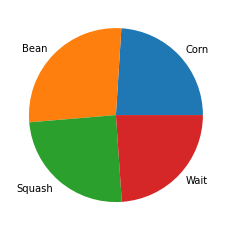

Mean Score: 162.69086913333294
Max Score: 165.52
Min Score: 161.61
Running generation 329 of 500


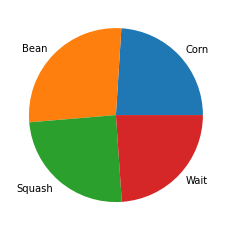

Mean Score: 162.66071366666628
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 330 of 500


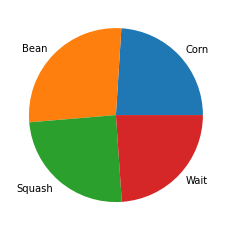

Mean Score: 162.66175346666626
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 331 of 500


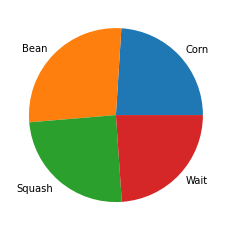

Mean Score: 162.6870499999995
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 332 of 500


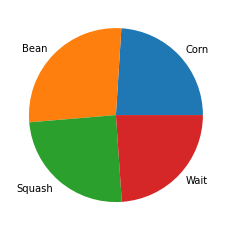

Mean Score: 162.65706099999946
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 333 of 500


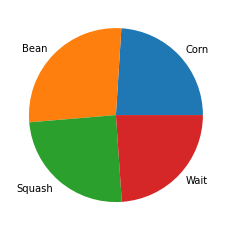

Mean Score: 162.7215299999996
Max Score: 165.52
Min Score: 161.61
Running generation 334 of 500


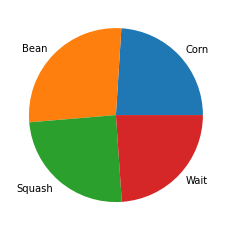

Mean Score: 162.6262103333329
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 335 of 500


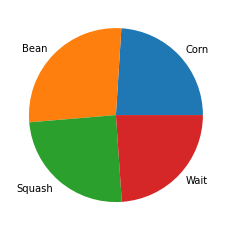

Mean Score: 162.64728799999958
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 336 of 500


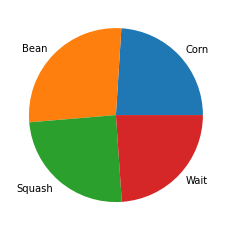

Mean Score: 162.68657746666622
Max Score: 165.52
Min Score: 160.782
Running generation 337 of 500


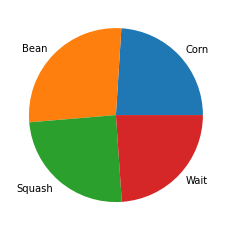

Mean Score: 162.68407229999966
Max Score: 165.52
Min Score: 161.5569
Running generation 338 of 500


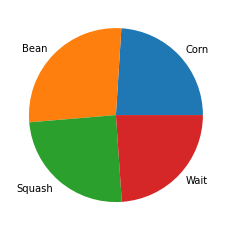

Mean Score: 162.71478666666644
Max Score: 165.52
Min Score: 161.61
Running generation 339 of 500


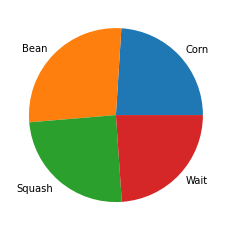

Mean Score: 162.6793469999995
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 340 of 500


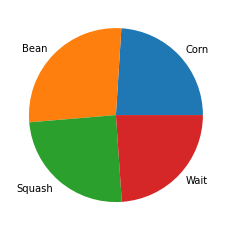

Mean Score: 162.67982499999965
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 341 of 500


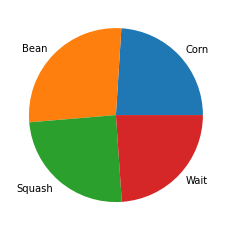

Mean Score: 162.69923999999966
Max Score: 165.52
Min Score: 161.61
Running generation 342 of 500


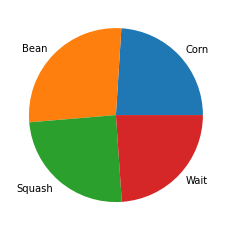

Mean Score: 162.72122599999958
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 343 of 500


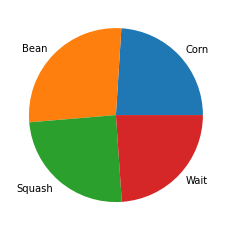

Mean Score: 162.709190333333
Max Score: 165.52
Min Score: 160.782
Running generation 344 of 500


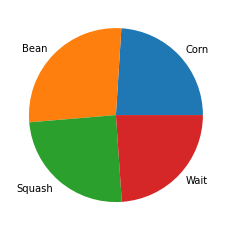

Mean Score: 162.70445133333294
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 345 of 500


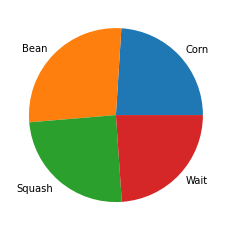

Mean Score: 162.64623919999948
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 346 of 500


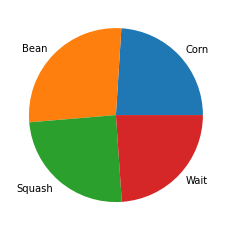

Mean Score: 162.62487666666615
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 347 of 500


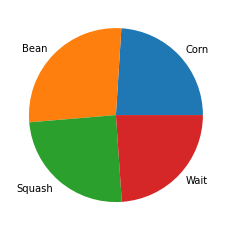

Mean Score: 162.67486699999955
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 348 of 500


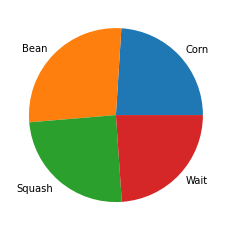

Mean Score: 162.6964096666662
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 349 of 500


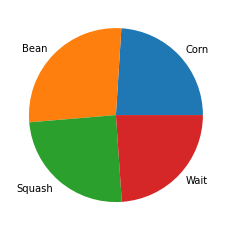

Mean Score: 162.70285999999948
Max Score: 165.52
Min Score: 161.61
Running generation 350 of 500


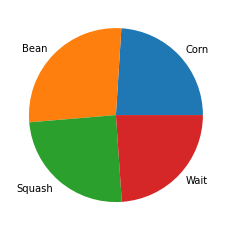

Mean Score: 162.6785053666662
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 351 of 500


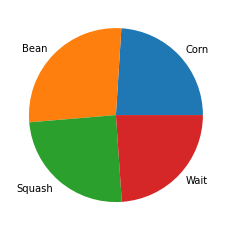

Mean Score: 162.67546199999967
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 352 of 500


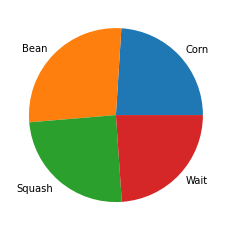

Mean Score: 162.68097033333282
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 353 of 500


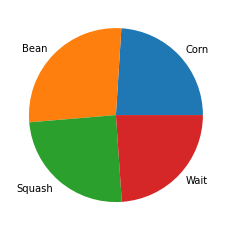

Mean Score: 162.70035109999958
Max Score: 165.52
Min Score: 161.52729000000002
Running generation 354 of 500


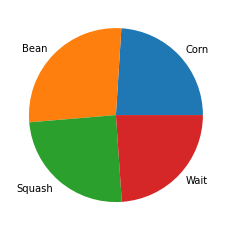

Mean Score: 162.66510699999944
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 355 of 500


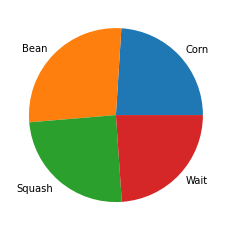

Mean Score: 162.67943466666622
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 356 of 500


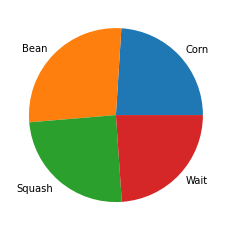

Mean Score: 162.67658666666614
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 357 of 500


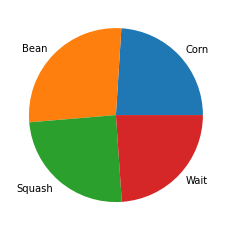

Mean Score: 162.66229446666622
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 358 of 500


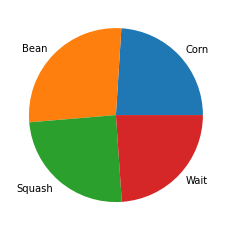

Mean Score: 162.72679333333298
Max Score: 165.52
Min Score: 161.62000000000003
Running generation 359 of 500


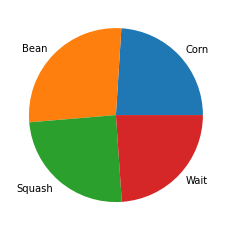

Mean Score: 162.66322999999952
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 360 of 500


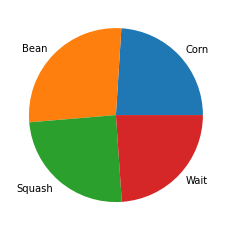

Mean Score: 162.69296533333286
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 361 of 500


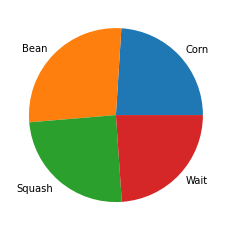

Mean Score: 162.72690199999963
Max Score: 165.52
Min Score: 161.53000000000003
Running generation 362 of 500


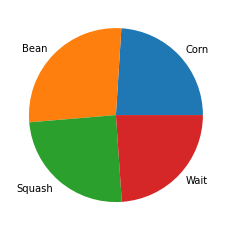

Mean Score: 162.6723419199996
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 363 of 500


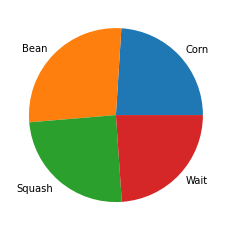

Mean Score: 162.67258879999955
Max Score: 165.52
Min Score: 161.56500000000003
Running generation 364 of 500


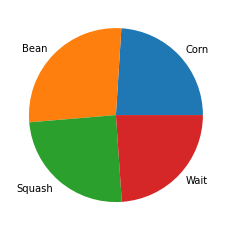

Mean Score: 162.6885729999996
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 365 of 500


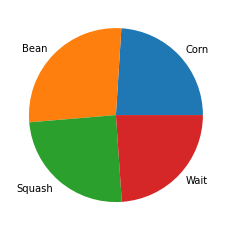

Mean Score: 162.74125999999978
Max Score: 165.52
Min Score: 161.61
Running generation 366 of 500


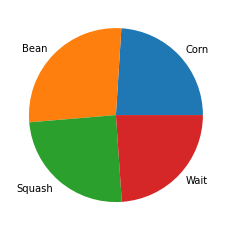

Mean Score: 162.7075140333329
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 367 of 500


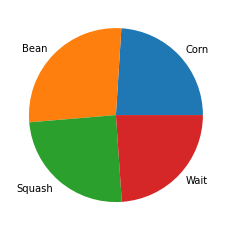

Mean Score: 162.70913253333302
Max Score: 165.52
Min Score: 161.61
Running generation 368 of 500


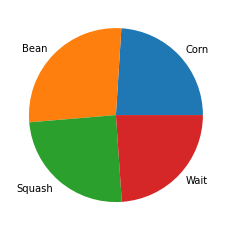

Mean Score: 162.71541399999956
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 369 of 500


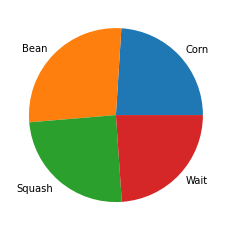

Mean Score: 162.74870333333297
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 370 of 500


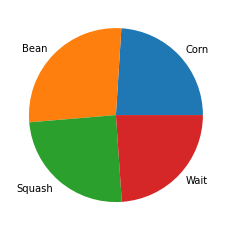

Mean Score: 162.66046336666625
Max Score: 165.52
Min Score: 161.5569
Running generation 371 of 500


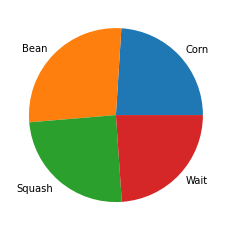

Mean Score: 162.69680999999952
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 372 of 500


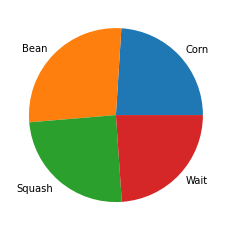

Mean Score: 162.6512599999995
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 373 of 500


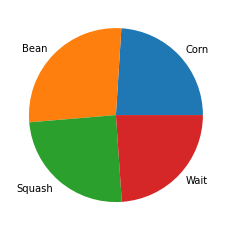

Mean Score: 162.67209999999952
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 374 of 500


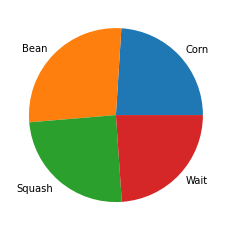

Mean Score: 162.6699075666662
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 375 of 500


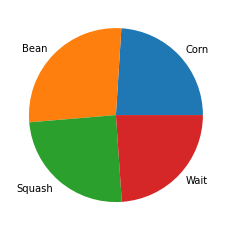

Mean Score: 162.68443166666628
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 376 of 500


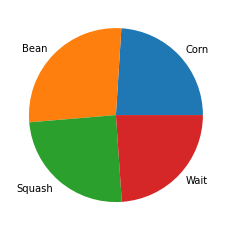

Mean Score: 162.69283699999954
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 377 of 500


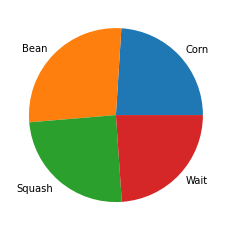

Mean Score: 162.68706958666615
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 378 of 500


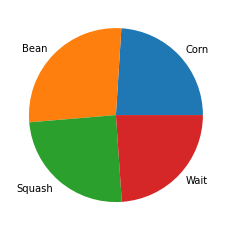

Mean Score: 162.67607999999967
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 379 of 500


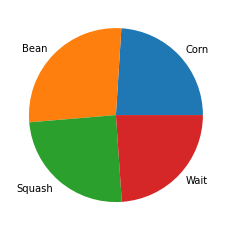

Mean Score: 162.7101499999996
Max Score: 165.52
Min Score: 161.52
Running generation 380 of 500


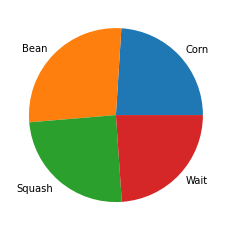

Mean Score: 162.68111333333295
Max Score: 165.52
Min Score: 161.3
Running generation 381 of 500


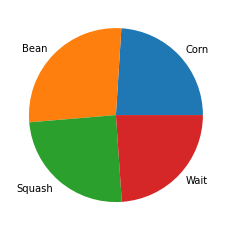

Mean Score: 162.68236499999958
Max Score: 165.52
Min Score: 161.61
Running generation 382 of 500


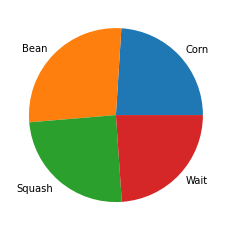

Mean Score: 162.67615533333304
Max Score: 165.52
Min Score: 161.3
Running generation 383 of 500


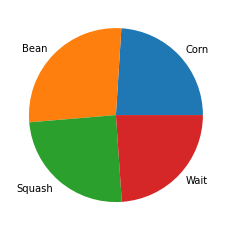

Mean Score: 162.67679999999956
Max Score: 165.52
Min Score: 161.53000000000003
Running generation 384 of 500


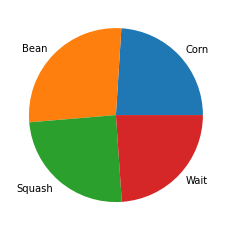

Mean Score: 162.71117333333297
Max Score: 165.52
Min Score: 161.61
Running generation 385 of 500


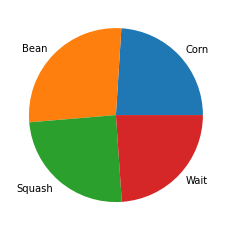

Mean Score: 162.6755686666663
Max Score: 165.52
Min Score: 160.782
Running generation 386 of 500


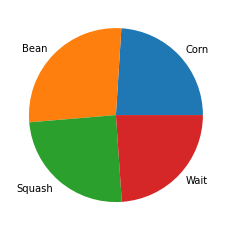

Mean Score: 162.70175866666622
Max Score: 165.52
Min Score: 161.56500000000003
Running generation 387 of 500


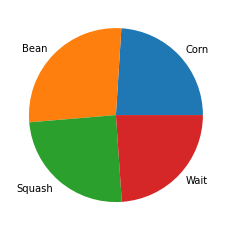

Mean Score: 162.70777966666628
Max Score: 165.52
Min Score: 161.3
Running generation 388 of 500


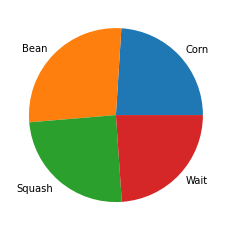

Mean Score: 162.67861199999953
Max Score: 165.52
Min Score: 161.61
Running generation 389 of 500


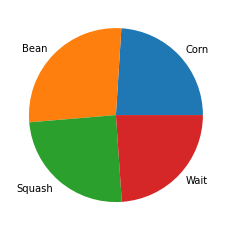

Mean Score: 162.69275799999951
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 390 of 500


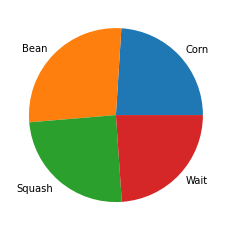

Mean Score: 162.71137406666634
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 391 of 500


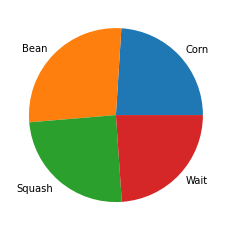

Mean Score: 162.65717199999952
Max Score: 165.52
Min Score: 161.3
Running generation 392 of 500


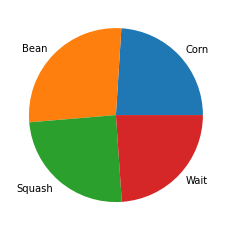

Mean Score: 162.70991999999958
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 393 of 500


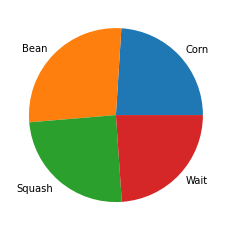

Mean Score: 162.71630333333292
Max Score: 165.52
Min Score: 161.61
Running generation 394 of 500


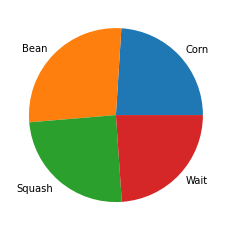

Mean Score: 162.70562166666633
Max Score: 165.52
Min Score: 161.61
Running generation 395 of 500


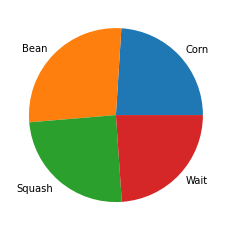

Mean Score: 162.6831739999997
Max Score: 165.52
Min Score: 161.52
Running generation 396 of 500


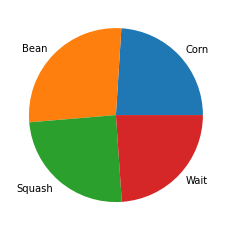

Mean Score: 162.6531899999996
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 397 of 500


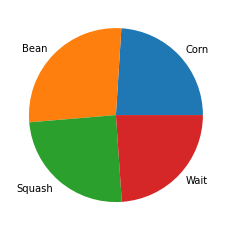

Mean Score: 162.67375766666615
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 398 of 500


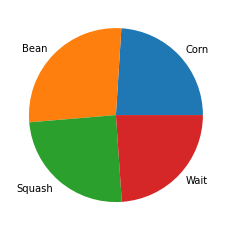

Mean Score: 162.685950333333
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 399 of 500


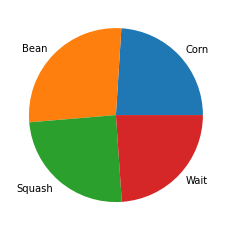

Mean Score: 162.6817453333329
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 400 of 500


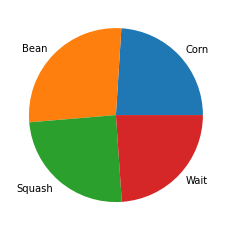

Mean Score: 162.70500033333295
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 401 of 500


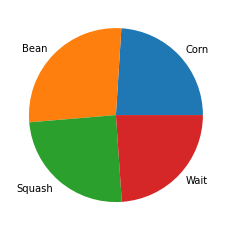

Mean Score: 162.68818033333304
Max Score: 165.52
Min Score: 160.59100000000004
Running generation 402 of 500


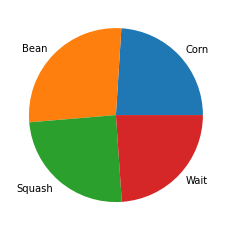

Mean Score: 162.69714325333308
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 403 of 500


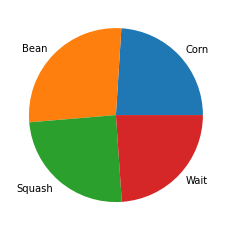

Mean Score: 162.63781333333276
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 404 of 500


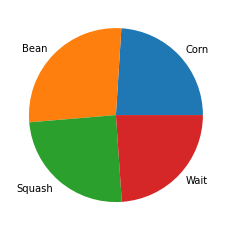

Mean Score: 162.66885449999953
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 405 of 500


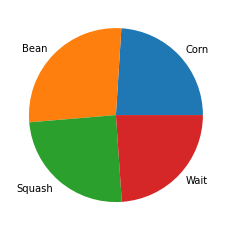

Mean Score: 162.68306199999975
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 406 of 500


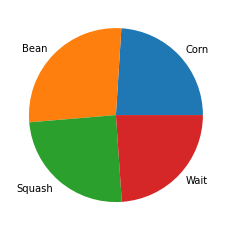

Mean Score: 162.70113336666623
Max Score: 165.52
Min Score: 161.5029
Running generation 407 of 500


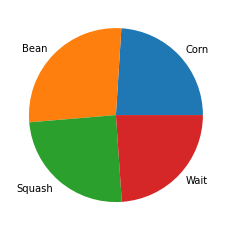

Mean Score: 162.68394169999956
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 408 of 500


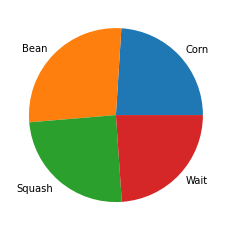

Mean Score: 162.6872483333329
Max Score: 165.52
Min Score: 161.59600000000003
Running generation 409 of 500


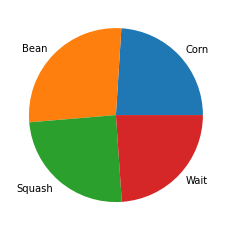

Mean Score: 162.6896283333328
Max Score: 165.52
Min Score: 161.58
Running generation 410 of 500


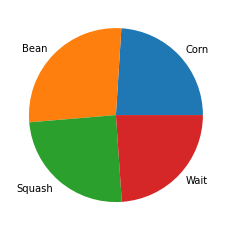

Mean Score: 162.67023366666618
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 411 of 500


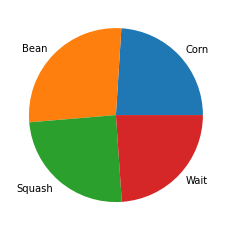

Mean Score: 162.67116583333285
Max Score: 165.52
Min Score: 161.50100000000003
Running generation 412 of 500


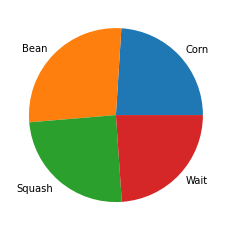

Mean Score: 162.68319666666633
Max Score: 165.52
Min Score: 161.52
Running generation 413 of 500


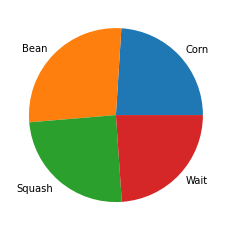

Mean Score: 162.69503933333294
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 414 of 500


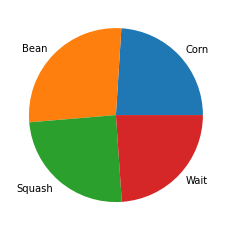

Mean Score: 162.70238999999958
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 415 of 500


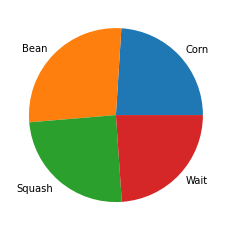

Mean Score: 162.67428799999976
Max Score: 165.52
Min Score: 161.61
Running generation 416 of 500


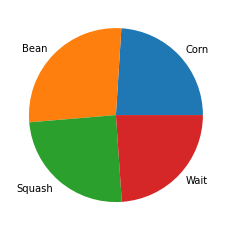

Mean Score: 162.68151642333305
Max Score: 165.52
Min Score: 161.56592700000002
Running generation 417 of 500


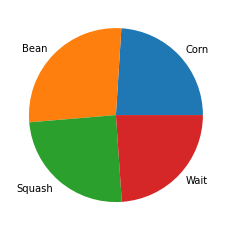

Mean Score: 162.7050056666662
Max Score: 165.52
Min Score: 161.61
Running generation 418 of 500


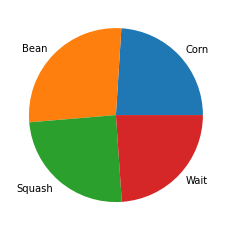

Mean Score: 162.67045333333286
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 419 of 500


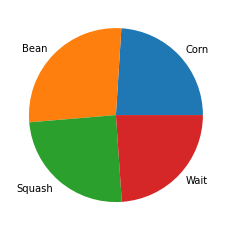

Mean Score: 162.70500233333286
Max Score: 165.52
Min Score: 161.61
Running generation 420 of 500


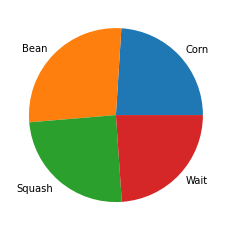

Mean Score: 162.6746799999996
Max Score: 165.52
Min Score: 161.61
Running generation 421 of 500


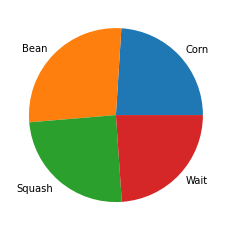

Mean Score: 162.6873869999996
Max Score: 165.52
Min Score: 161.61
Running generation 422 of 500


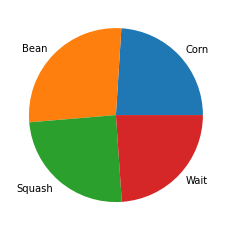

Mean Score: 162.69183999999967
Max Score: 165.52
Min Score: 161.50100000000003
Running generation 423 of 500


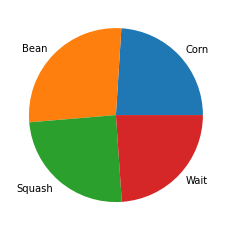

Mean Score: 162.70121333333282
Max Score: 165.52
Min Score: 161.62000000000003
Running generation 424 of 500


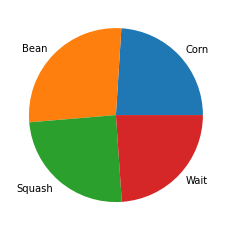

Mean Score: 162.66217066666636
Max Score: 165.52
Min Score: 161.52900000000002
Running generation 425 of 500


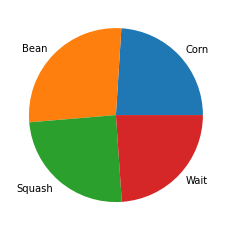

Mean Score: 162.68721899999954
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 426 of 500


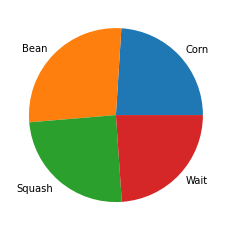

Mean Score: 162.66275366666625
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 427 of 500


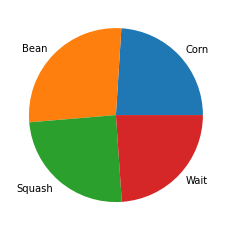

Mean Score: 162.71511679999952
Max Score: 165.52
Min Score: 161.61
Running generation 428 of 500


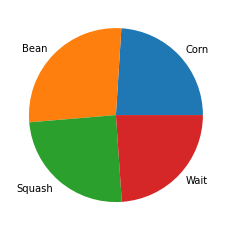

Mean Score: 162.68104386666624
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 429 of 500


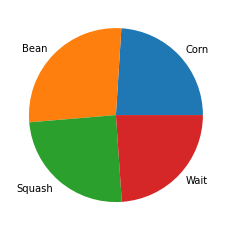

Mean Score: 162.70130999999967
Max Score: 165.52
Min Score: 161.3
Running generation 430 of 500


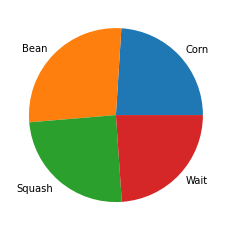

Mean Score: 162.70387199999962
Max Score: 165.52
Min Score: 161.61
Running generation 431 of 500


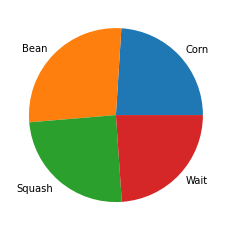

Mean Score: 162.70751366666624
Max Score: 165.52
Min Score: 161.58
Running generation 432 of 500


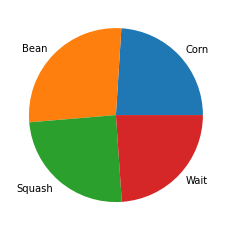

Mean Score: 162.69701199999972
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 433 of 500


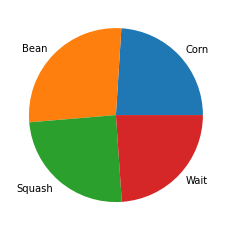

Mean Score: 162.70027166666617
Max Score: 165.52
Min Score: 161.61
Running generation 434 of 500


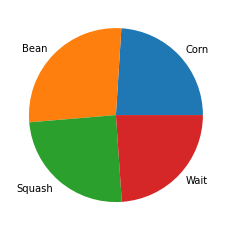

Mean Score: 162.69835799999964
Max Score: 165.52
Min Score: 161.51100000000002
Running generation 435 of 500


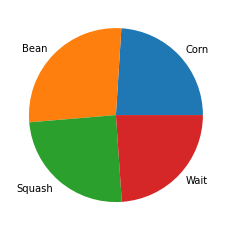

Mean Score: 162.6919833666661
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 436 of 500


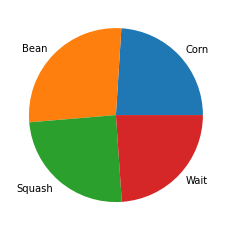

Mean Score: 162.68954333333292
Max Score: 165.52
Min Score: 161.53600000000003
Running generation 437 of 500


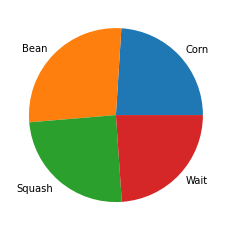

Mean Score: 162.71312333333307
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 438 of 500


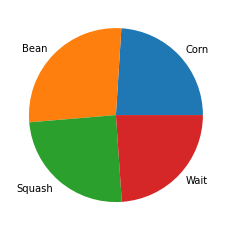

Mean Score: 162.6654411999996
Max Score: 165.52
Min Score: 161.61
Running generation 439 of 500


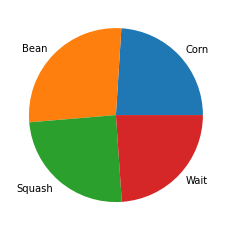

Mean Score: 162.6592236666663
Max Score: 165.52
Min Score: 160.782
Running generation 440 of 500


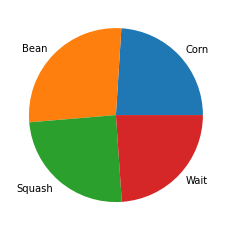

Mean Score: 162.6788189999995
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 441 of 500


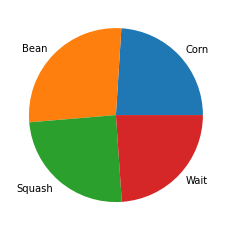

Mean Score: 162.7123033333329
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 442 of 500


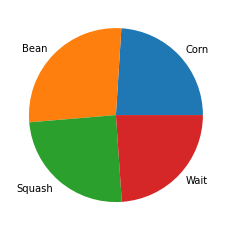

Mean Score: 162.68760333333302
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 443 of 500


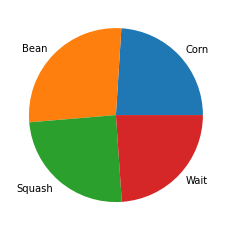

Mean Score: 162.70182533333298
Max Score: 165.52
Min Score: 161.58300000000003
Running generation 444 of 500


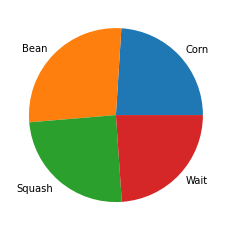

Mean Score: 162.6829876666663
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 445 of 500


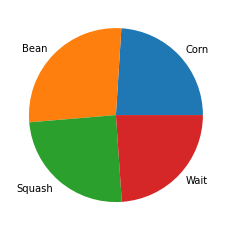

Mean Score: 162.69583666666625
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 446 of 500


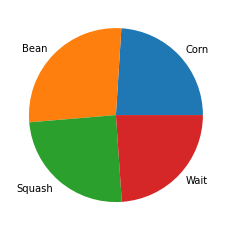

Mean Score: 162.68226333333308
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 447 of 500


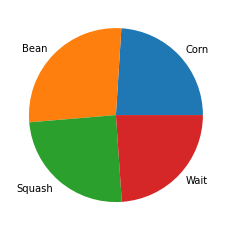

Mean Score: 162.6736133333329
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 448 of 500


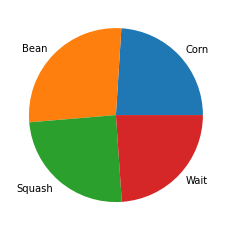

Mean Score: 162.69559299999932
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 449 of 500


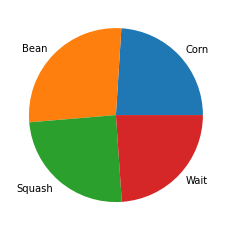

Mean Score: 162.7007446666663
Max Score: 165.52
Min Score: 161.61
Running generation 450 of 500


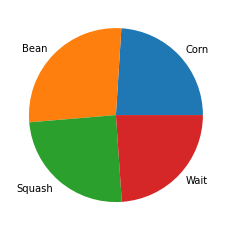

Mean Score: 162.69991199999959
Max Score: 165.52
Min Score: 161.61
Running generation 451 of 500


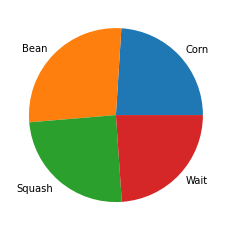

Mean Score: 162.66724153333303
Max Score: 165.52
Min Score: 161.61
Running generation 452 of 500


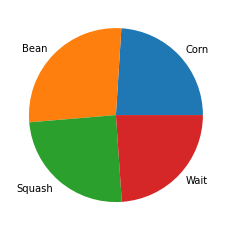

Mean Score: 162.72147466666635
Max Score: 165.52
Min Score: 161.53440000000003
Running generation 453 of 500


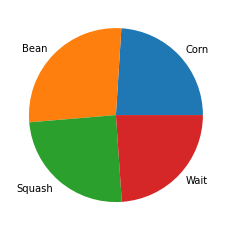

Mean Score: 162.63098333333286
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 454 of 500


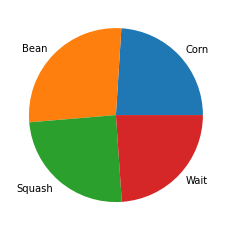

Mean Score: 162.67372119999968
Max Score: 165.52
Min Score: 160.782
Running generation 455 of 500


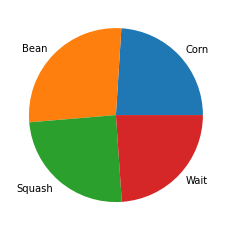

Mean Score: 162.68147999999965
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 456 of 500


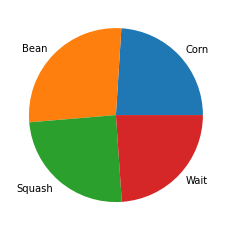

Mean Score: 162.72009499999967
Max Score: 165.52
Min Score: 161.56500000000003
Running generation 457 of 500


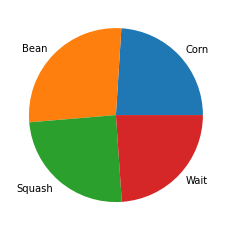

Mean Score: 162.69361999999956
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 458 of 500


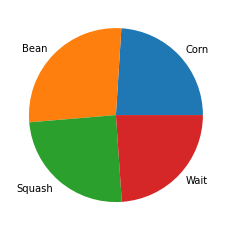

Mean Score: 162.68053299999957
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 459 of 500


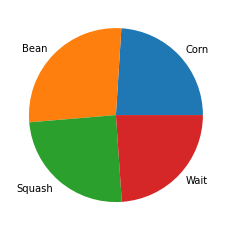

Mean Score: 162.66058666666612
Max Score: 165.52
Min Score: 160.692
Running generation 460 of 500


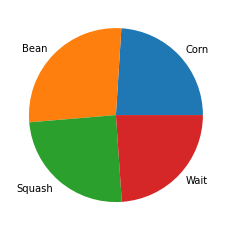

Mean Score: 162.72956566666645
Max Score: 165.52
Min Score: 161.52810000000002
Running generation 461 of 500


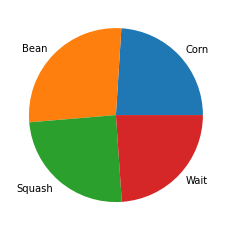

Mean Score: 162.6687866666663
Max Score: 165.52
Min Score: 161.53000000000003
Running generation 462 of 500


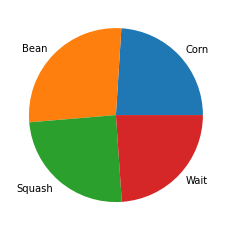

Mean Score: 162.62824213333283
Max Score: 165.52
Min Score: 161.53000000000003
Running generation 463 of 500


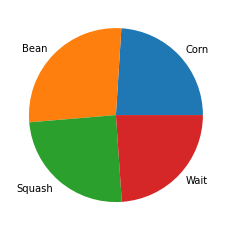

Mean Score: 162.68308133333286
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 464 of 500


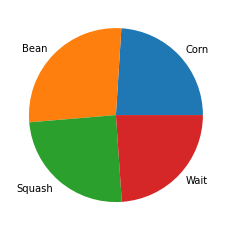

Mean Score: 162.68078333333298
Max Score: 165.52
Min Score: 161.61
Running generation 465 of 500


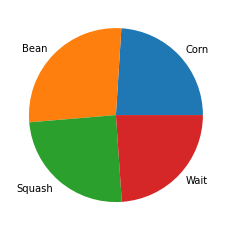

Mean Score: 162.68700599999966
Max Score: 165.52
Min Score: 161.61
Running generation 466 of 500


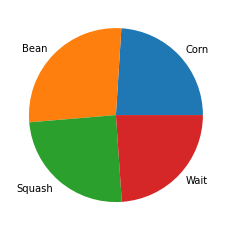

Mean Score: 162.72893033333295
Max Score: 165.52
Min Score: 161.61
Running generation 467 of 500


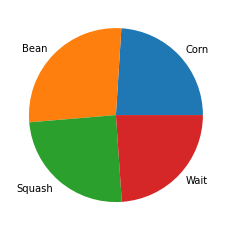

Mean Score: 162.65476466666604
Max Score: 165.52
Min Score: 161.51000000000002
Running generation 468 of 500


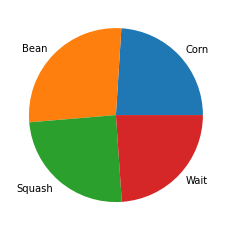

Mean Score: 162.6786666666662
Max Score: 165.52
Min Score: 161.61
Running generation 469 of 500


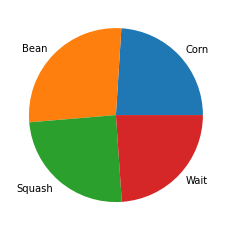

Mean Score: 162.6985099999996
Max Score: 165.52
Min Score: 160.692
Running generation 470 of 500


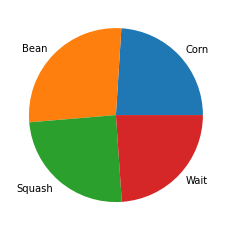

Mean Score: 162.67946499999965
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 471 of 500


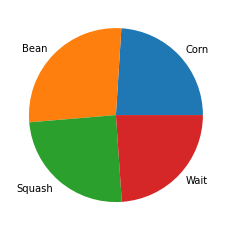

Mean Score: 162.67540999999954
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 472 of 500


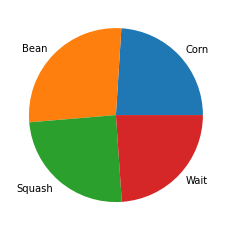

Mean Score: 162.69744333333287
Max Score: 165.52
Min Score: 161.53000000000003
Running generation 473 of 500


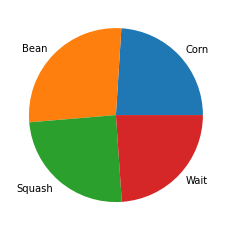

Mean Score: 162.66456666666633
Max Score: 165.52
Min Score: 160.692
Running generation 474 of 500


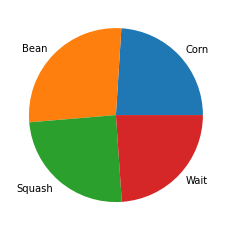

Mean Score: 162.71236342333285
Max Score: 165.52
Min Score: 161.56592700000002
Running generation 475 of 500


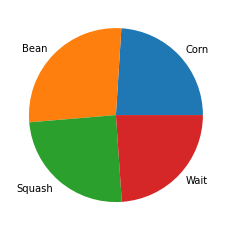

Mean Score: 162.65315303333279
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 476 of 500


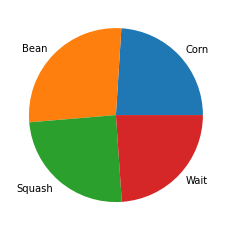

Mean Score: 162.7260866666664
Max Score: 165.52
Min Score: 161.61
Running generation 477 of 500


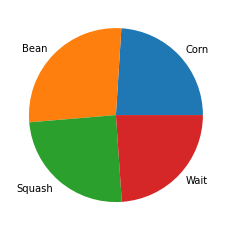

Mean Score: 162.714333333333
Max Score: 165.52
Min Score: 161.58300000000003
Running generation 478 of 500


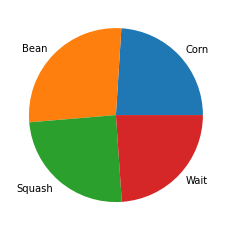

Mean Score: 162.7227519999997
Max Score: 165.52
Min Score: 161.59000000000003
Running generation 479 of 500


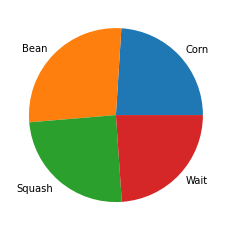

Mean Score: 162.6658087999995
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 480 of 500


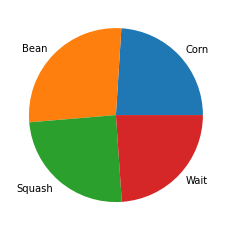

Mean Score: 162.6663466666663
Max Score: 165.52
Min Score: 160.782
Running generation 481 of 500


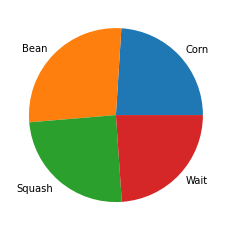

Mean Score: 162.64959759633274
Max Score: 165.52
Min Score: 161.57887890000003
Running generation 482 of 500


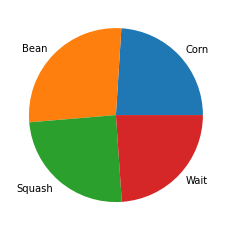

Mean Score: 162.6538896666663
Max Score: 165.52
Min Score: 161.61
Running generation 483 of 500


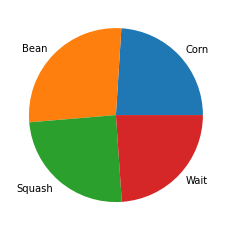

Mean Score: 162.71321833333303
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 484 of 500


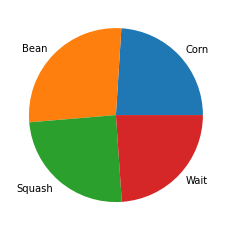

Mean Score: 162.71776716666622
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 485 of 500


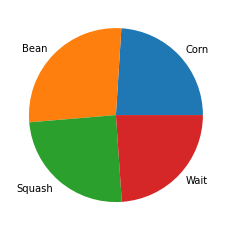

Mean Score: 162.67572546666625
Max Score: 165.52
Min Score: 161.46099999999998
Running generation 486 of 500


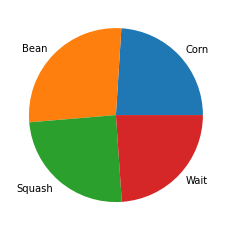

Mean Score: 162.68483466666618
Max Score: 165.52
Min Score: 161.56500000000003
Running generation 487 of 500


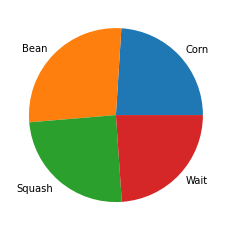

Mean Score: 162.70695133333294
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 488 of 500


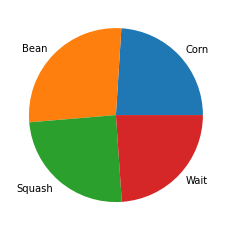

Mean Score: 162.68373333333292
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 489 of 500


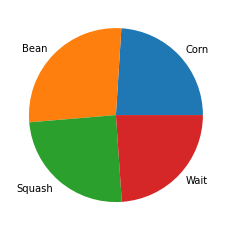

Mean Score: 162.66800763333305
Max Score: 165.52
Min Score: 161.52729000000002
Running generation 490 of 500


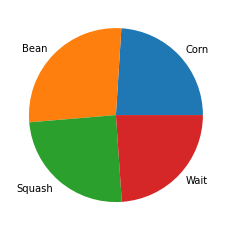

Mean Score: 162.65827666666627
Max Score: 165.52
Min Score: 161.57000000000002
Running generation 491 of 500


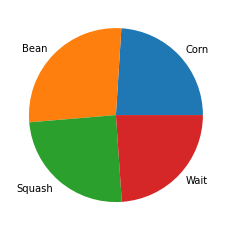

Mean Score: 162.7327729999996
Max Score: 165.52
Min Score: 161.59290000000001
Running generation 492 of 500


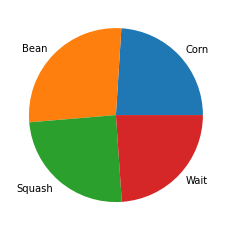

Mean Score: 162.71266433333295
Max Score: 165.52
Min Score: 161.61
Running generation 493 of 500


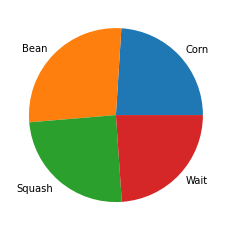

Mean Score: 162.67001036666625
Max Score: 165.52
Min Score: 161.58561000000003
Running generation 494 of 500


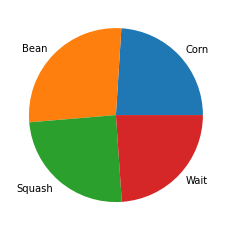

Mean Score: 162.70605133333305
Max Score: 165.52
Min Score: 161.61
Running generation 495 of 500


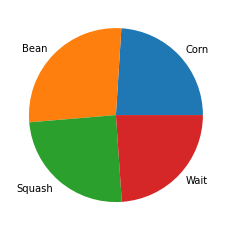

Mean Score: 162.7053199999996
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 496 of 500


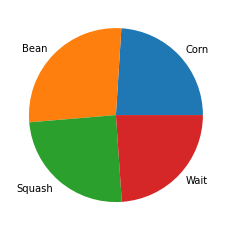

Mean Score: 162.68033799999958
Max Score: 165.52
Min Score: 160.70000000000002
Running generation 497 of 500


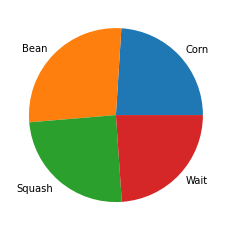

Mean Score: 162.70128999999974
Max Score: 165.52
Min Score: 161.60100000000003
Running generation 498 of 500


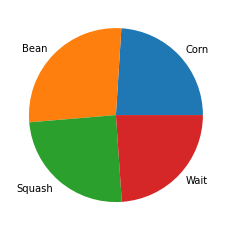

Mean Score: 162.71298466666627
Max Score: 165.52
Min Score: 161.52
Running generation 499 of 500


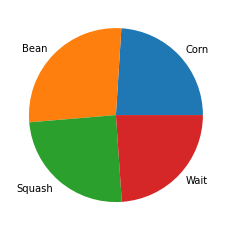

Mean Score: 162.68910999999943
Max Score: 165.52
Min Score: 161.58


In [6]:
new_field = Field()
new_field.reset()
agent = Elitist_GA(100, new_field, 0.5, 0.1, 300, 16)

agent.run_verbose_generations(500)



Yield: 160.59999999999997


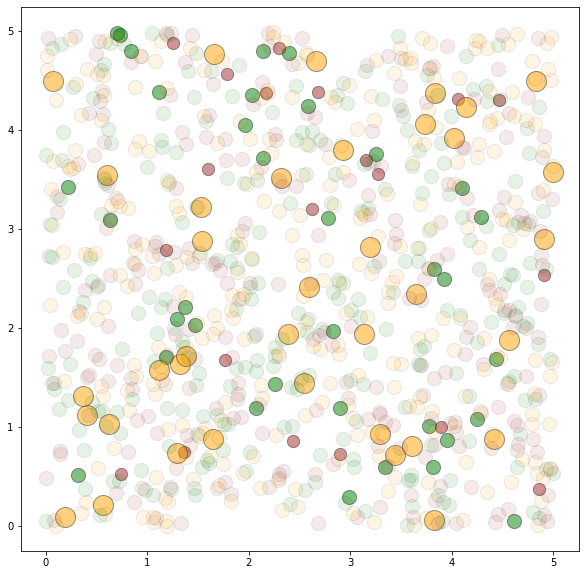

NameError: name 'reward' is not defined

In [35]:
pop = agent.get_population()
render_field = Field()
render_field.reset()

to_print = 1

i = 0
while i < pop[0].path.shape[0]:
    render_field.step(pop[to_print].path[i:i+10])
    i+=10
print("Yield:" , pop[to_print].score)
render_field.render()

In [22]:
zero = 0
one = 0
two = 0
three = 0

for child in pop:
    for action in child.path:
        if action[0] == 0:
            zero +=1
        if action[0] == 1:
            one +=1
        if action[0] == 2:
            two +=1
        if action[0] == 3:
            three +=1
print("zeroes:", zero/len(pop))
print("ones:", one/len(pop))
print("twos:", two/len(pop))
print("threes:", three/len(pop))


zeroes: 323.0
ones: 280.0
twos: 295.0
threes: 302.0


In [50]:
##Population generation. 100 initial population


test_field = Field()
population = [] #List of numpy arrays (steps to take)



for i in range(100):
    test_field.reset()
    path = np.empty((0,3))
    done = False
    while not(done):
        step = np.ones((10,3))

        for i in range(10):
            step[i][0] = np.random.randint(4)
            step[i][1] = np.random.randint(10)
            step[i][2] = np.random.randint(10)
        observation, reward, done, _ = test_field.step(step)
        for i in range(10):
            path = np.append(path, step[i])
        path = np.reshape(path, (int(len(path)/3), 3))
    ret = Path(path, reward)
    population.append(ret)
print(len(population))


    


100


In [49]:
render_field = Field()
render_field.reset()

total_yield = 0

for j in range(100):
    render_field.reset()
    for i in range(int(population[0].shape[0]/10)):
        observation, reward, done, _ = render_field.step(population[j][i:i+10])
        total_yield += reward
    if j % 10 == 0:
        print("Processed",j)

print(total_yield/100)





Processed 0
Processed 10
Processed 20
Processed 30
Processed 40
Processed 50
Processed 60
Processed 70
Processed 80
Processed 90
145.1010359597972


In [21]:
observation, reward, done, _ = test_field.step(population[0])
print(done)

False
